In [2]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# from auswertung_ma import f_exp, f_poly, f_poly_long

In [3]:
# plot settings:
plot_output_path = r'D:\Uni\Masterarbeit\MA_Dokument\english\bilder'

markersize = 11
markerfacecolor = 'none'

label_fontsize = 20
capsize = 5
axislabelsize = 35

legendfontsize = 30

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
})

Hier will ich die Auswertung fuer die Variation von c nochmal ausführlich machen

In [4]:
# lese die vorausgewerteten Daten ein
p = r'D:\Uni\Masterarbeit\Daten\Anteil\5_scenarios\Vorauswertung'
data_vor, lp_vor = auswertung_ma.read_vorauswertung(p, id='c', id_stelle=1, read_lp=True)

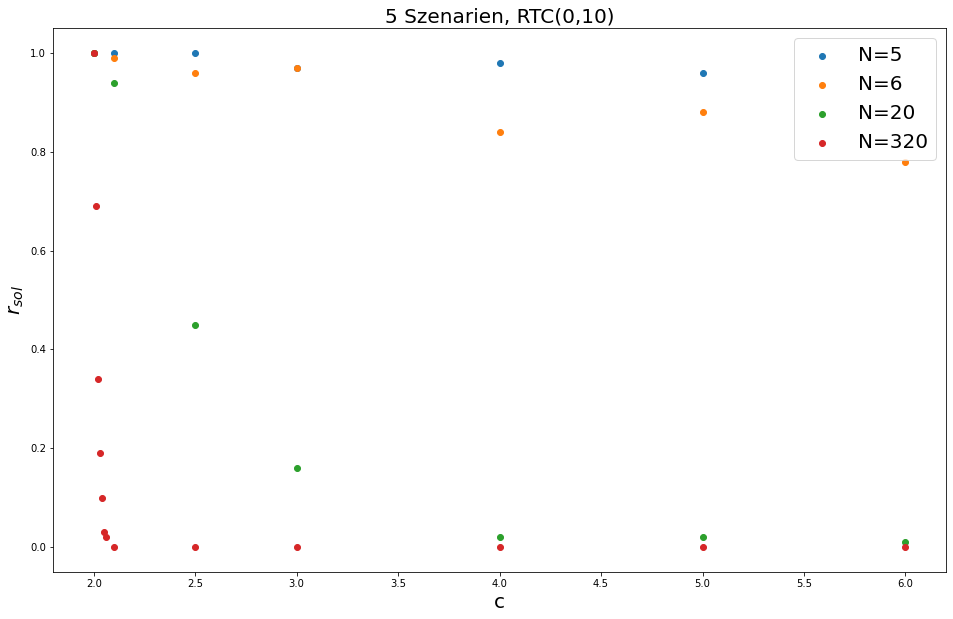

In [9]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(lp_vor.keys()):

    ax.scatter(lp_vor[n].index, lp_vor[n]['Anteil_GGL'], label=f'N={n}')

ax.set_xlabel('c', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('5 Szenarien, RTC(0,10)', fontsize=20)
ax.legend(fontsize=20)

Algorithmus Performance Vergleich

[] [320]


Text(0, 0.5, 'Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

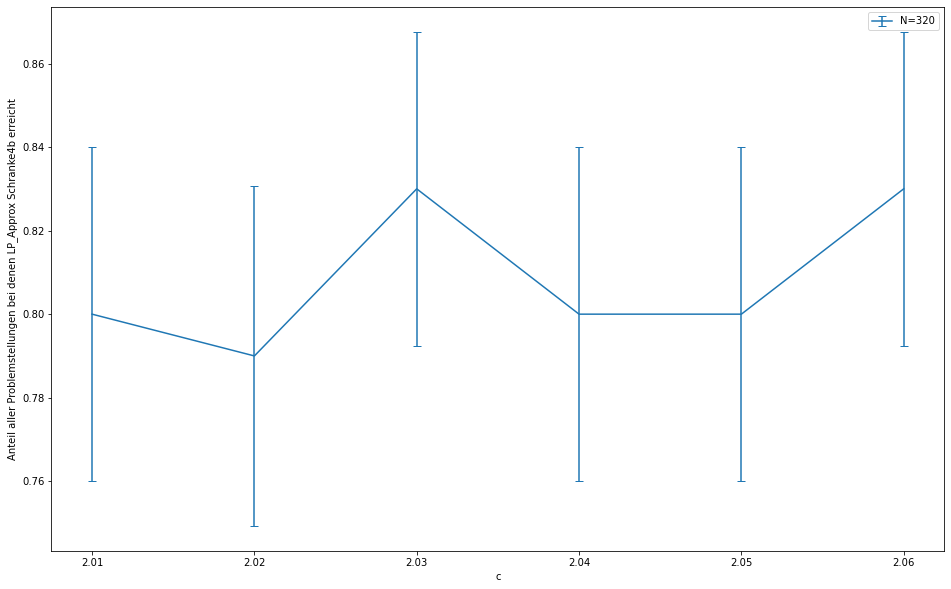

In [14]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.1
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('c')
ax.set_ylabel('Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

# ax.set_xlim([0.615,.65])
# ax.set_ylim([0.86, 0.91])

# ax.set_xlim([0.55,.71])
# ax.set_ylim([0.84, 0.99])

# plt.savefig('pk_uebergang_lp.png')

[] [320]


Text(0, 0.5, 'Anteil aller Problemstellungen bei denen Greedy Schranke4b erreicht')

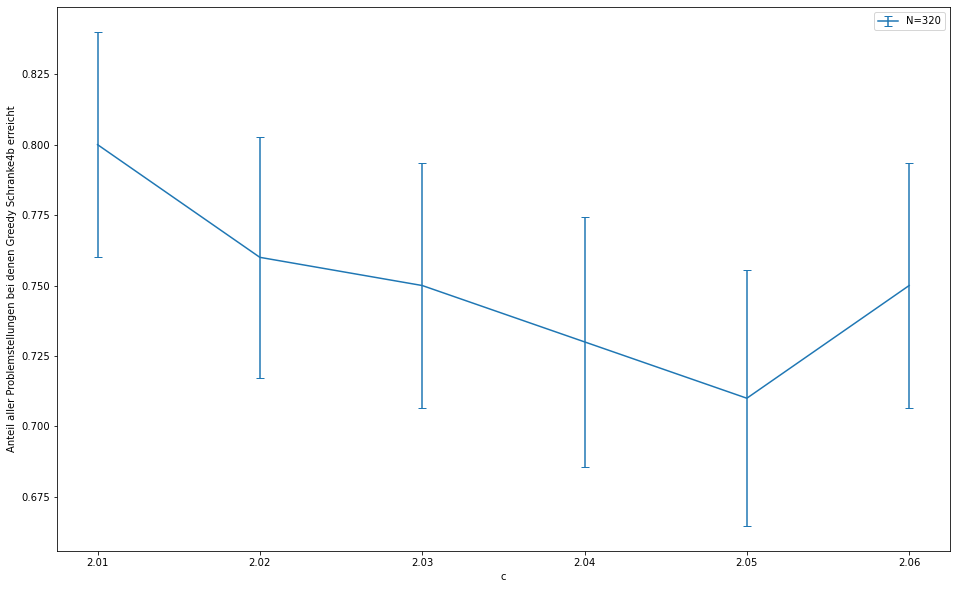

In [17]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.1
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('c')
ax.set_ylabel('Anteil aller Problemstellungen bei denen Greedy Schranke4b erreicht')

# ax.set_xlim([0.49,.81])
# ax.set_ylim([0.8, 1.02])

# ax.set_xlim([0.62, 0.66])
# ax.set_ylim([0.5, .9])

# plt.savefig('pk_uebergang_lp.png')

In [34]:
n = 2000
auswertung_ma.calc_expected_edges_p(n, auswertung_ma.calc_p_to_c(n, 2)) / n

0.9995

In [37]:
n = 20
c = 20
auswertung_ma.calc_p_to_c(n, c)

1.0

# 1 Szenario

In [55]:
# lese die vorausgewerteten Daten ein
p1 = r'D:\Uni\Masterarbeit\Daten\Graphstruktur\1_scenario\Vorauswertung'
data_vor1, lp_vor1 = auswertung_ma.read_vorauswertung(p1, id='c', id_stelle=1, read_lp=True)

### mean results

In [11]:
ns = sorted(data_vor1.keys())
mr, sme = data_vor1[80].calc_mean_alg_results()

In [75]:
print((mr['LP_Approx'] / mr['Schranke4b']).idxmax())
print((mr['Greedy'] / mr['Schranke4b']).idxmax())

40.0
10.0


In [52]:
data_vor1[40].calc_statistic_size()

,stat_size
ids,
2.00,25000
2.01,30000
2.02,30000
2.03,30000
2.04,30000
...,...
36.00,5000
37.00,5000
38.00,5000


In [90]:
# (mr['LP_Approx'] / mr['Schranke4b'])

In [89]:
# sme

In [103]:
# data_vor1[40].calc_statistic_size()

20
40
80
160


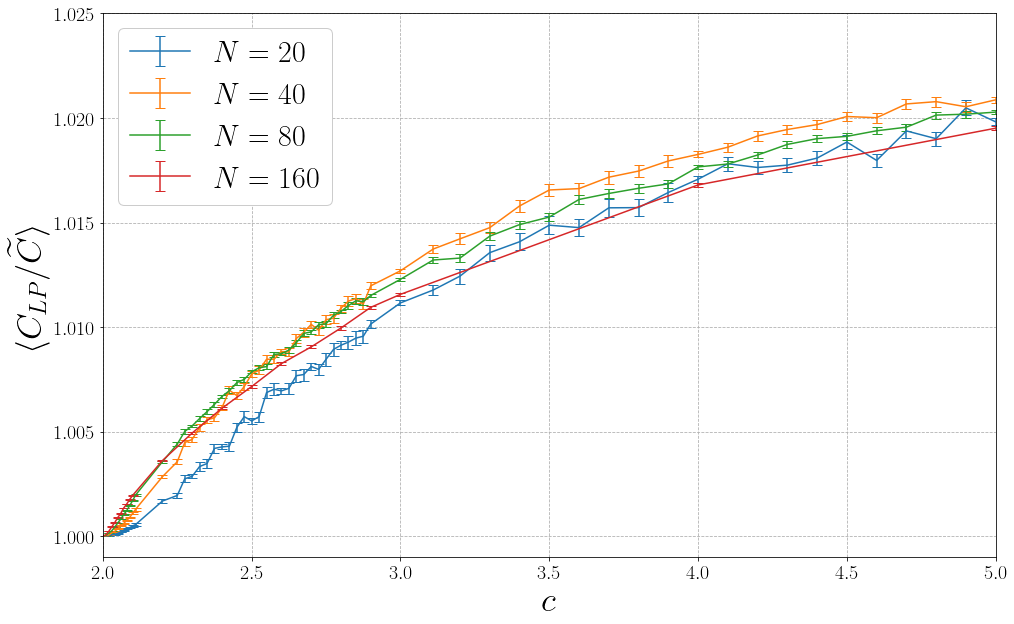

In [56]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'LP_Approx'

for l in sorted(data_vor1.keys()):
    print(l)
    
    ii = []
    mean_vhs = []
    delta_vhs = []

    for i in data_vor1[l].id_values:
            
        if alg in data_vor1[l].raw_results[i].columns:

            ii.append(i)
            
            subset = data_vor1[l].raw_results[i].dropna(subset=alg)    

            vh = subset[alg] / subset['Schranke4b']

            mean_vhs.append(vh.mean())
            delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

    ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{LP}  /  \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim((2,5))
ax.set_ylim((0.999, 1.025))

plt.savefig(os.path.join(plot_output_path, 'clp_durch_bound_1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80
160


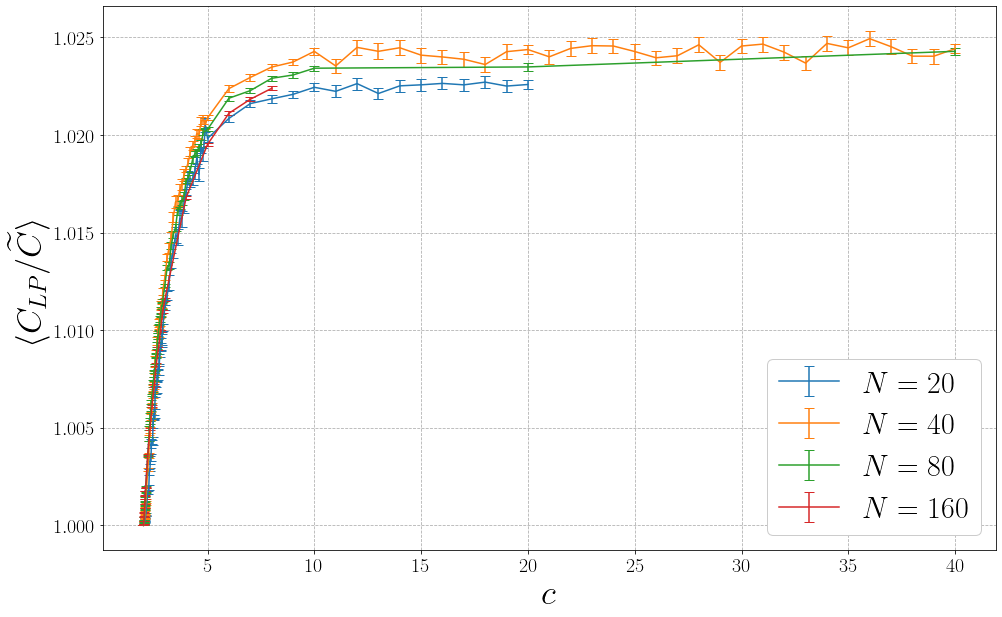

In [57]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'LP_Approx'

for l in sorted(data_vor1.keys()):
    print(l)
    
    ii = []
    mean_vhs = []
    delta_vhs = []

    for i in data_vor1[l].id_values:
            
        if alg in data_vor1[l].raw_results[i].columns:

            ii.append(i)
            
            subset = data_vor1[l].raw_results[i].dropna(subset=alg)    

            vh = subset[alg] / subset['Schranke4b']

            mean_vhs.append(vh.mean())
            delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

    ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{LP} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim((2,5))
# ax.set_ylim((0.999, 1.025))



plt.savefig(os.path.join(plot_output_path, 'clp_durch_bound_1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80
160


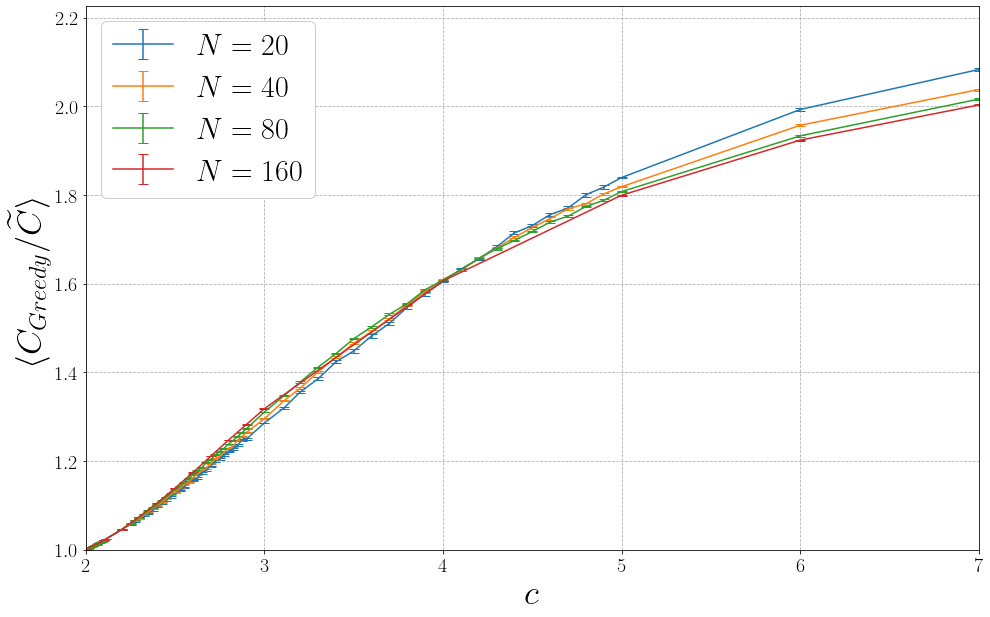

In [58]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'Greedy'

for l in sorted(data_vor1.keys()):
    print(l)
    
    ii = []
    mean_vhs = []
    delta_vhs = []

    for i in data_vor1[l].id_values:
            
        if alg in data_vor1[l].raw_results[i].columns:

            ii.append(i)
            
            subset = data_vor1[l].raw_results[i].dropna(subset=alg)    

            vh = subset[alg] / subset['Schranke4b']

            mean_vhs.append(vh.mean())
            delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

    ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{Greedy} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim((2,7))
ax.set_ylim((0.999, 2.225))
plt.savefig(os.path.join(plot_output_path, 'cgreedy_durch_bound_1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

20
40
80
160


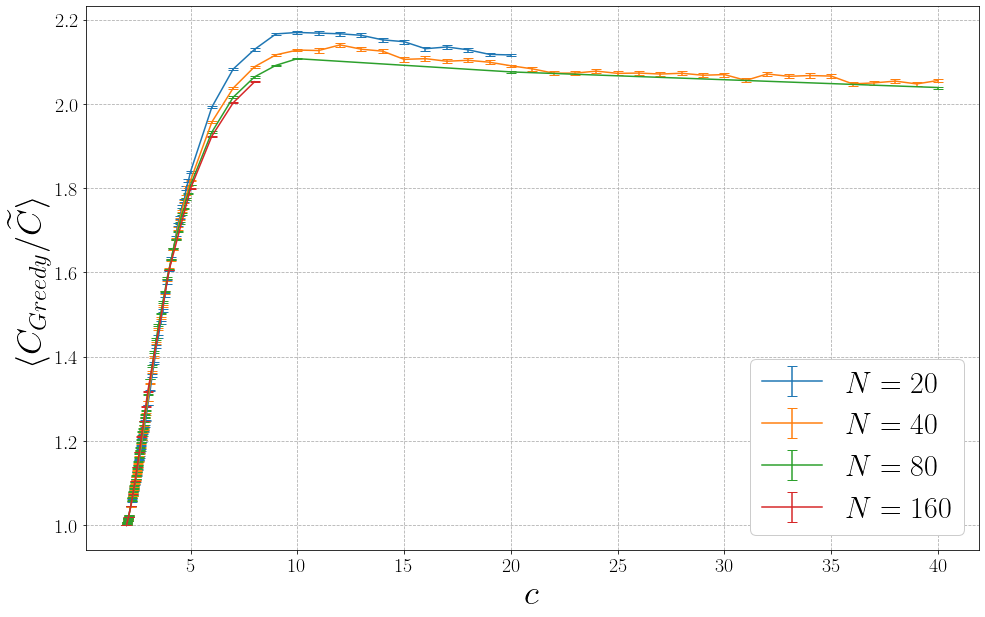

In [59]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'Greedy'

for l in sorted(data_vor1.keys()):
    print(l)
    
    ii = []
    mean_vhs = []
    delta_vhs = []

    for i in data_vor1[l].id_values:
            
        if alg in data_vor1[l].raw_results[i].columns:

            ii.append(i)
            
            subset = data_vor1[l].raw_results[i].dropna(subset=alg)    

            vh = subset[alg] / subset['Schranke4b']

            mean_vhs.append(vh.mean())
            delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

    ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{Greedy}/ \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim((2,9))
# ax.set_ylim((0.999, 2.225))
plt.savefig(os.path.join(plot_output_path, 'cgreedy_durch_bound_1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

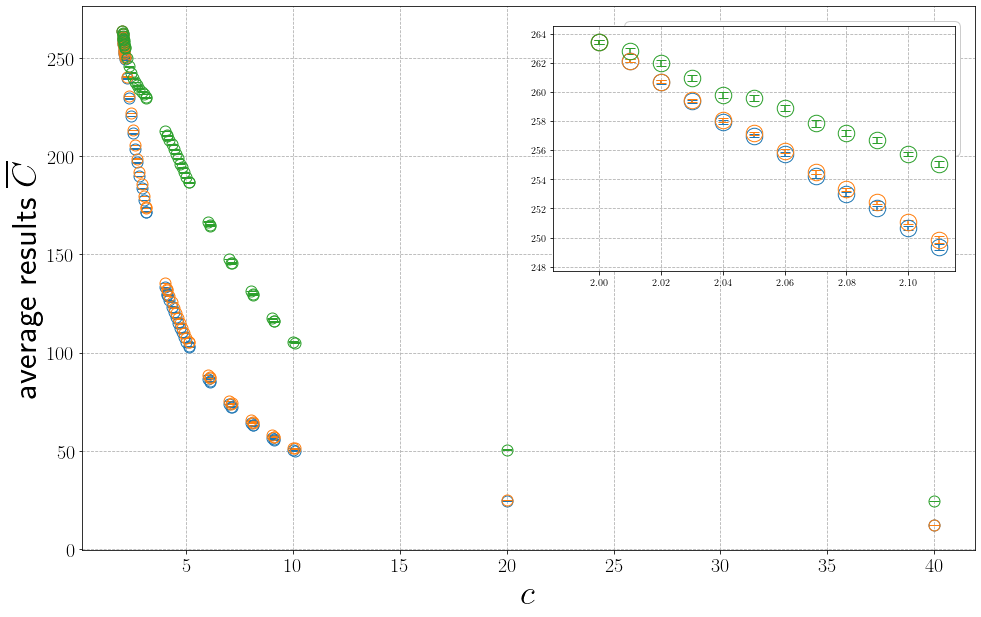

In [60]:
fig, ax = plt.subplots(figsize=(16,10))

# for n in ns:

ax.errorbar(mr.index, mr['Schranke4b'], yerr=sme['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound = Optimum')

ax.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx')
ax.errorbar(mr.index, mr['Greedy'], yerr=sme['Greedy'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Greedy Approx')


axins = inset_axes(ax, width='45%', height='45%', loc=1, borderpad=2)
axins.errorbar(mr.index, mr['Schranke4b'], yerr=sme['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='Bound = Optimum')
axins.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='LP-Approx, only cut-constraints')
axins.errorbar(mr.index, mr['Greedy'], yerr=sme['Greedy'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='LP-Approx, only cut-constraints')
axins.set_xlim((1.985, 2.115))
axins.set_ylim((247.7, 264.5))
axins.grid(ls='--')

# ax.errorbar(mr_ec.index, mr_ec['Schranke4b'], yerr=sme_ec['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')
# ax.errorbar(mr_ec.index, mr_ec['LP_Approx'], yerr=sme_ec['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'average results $\overline{C}$', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'c_mr1.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

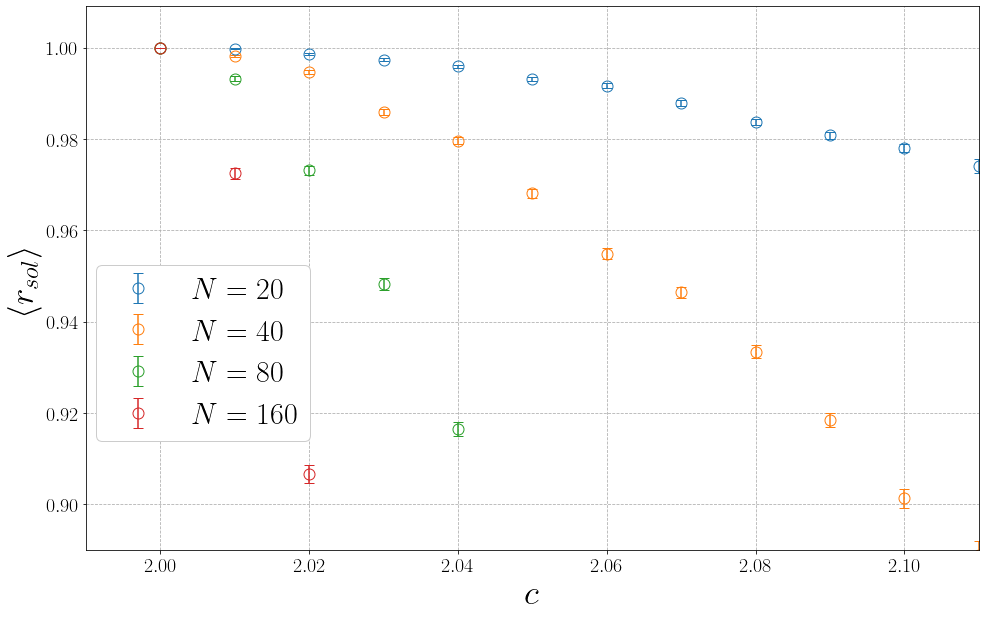

In [17]:
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in ns:
    
#     ax.scatter(lp_vor1[n].index, lp_vor1[n]['Anteil_GGL'], label=f"$N={n}$")
    ax.errorbar(lp_vor1[n].index, lp_vor1[n]['Anteil_GGL'], yerr=lp_vor1[n]['Delta_Anteil_GGL'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f"$N={n}$")
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{sol} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1, loc=(0.011, 0.2))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim([1.99, 2.11])
ax.set_ylim([0.89, 1.009])

plt.savefig(os.path.join(plot_output_path, 'c_rsol1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

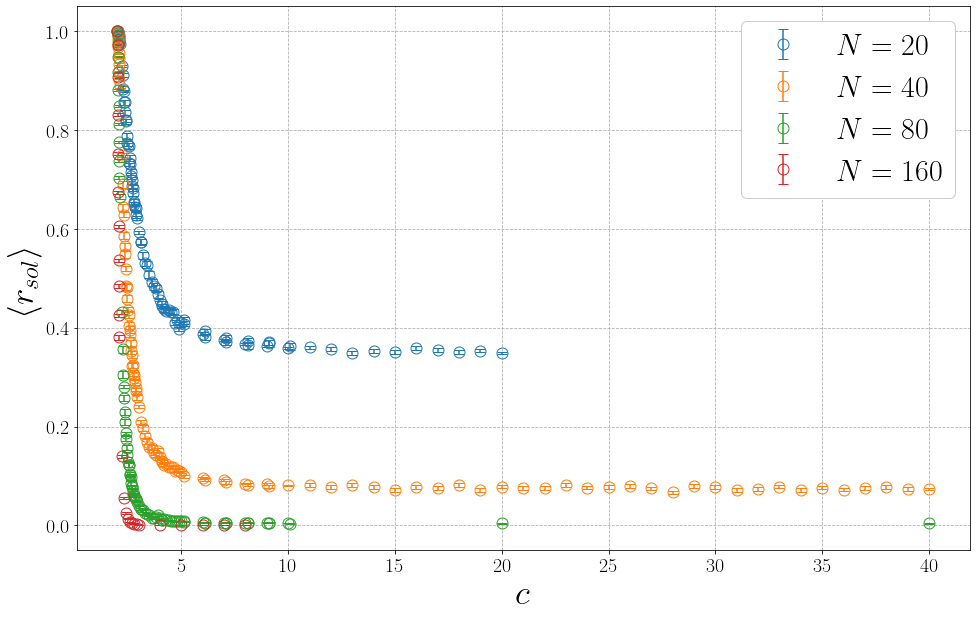

In [61]:
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in ns:
    
#     ax.scatter(lp_vor1[n].index, lp_vor1[n]['Anteil_GGL'], label=f"$N={n}$")
    ax.errorbar(lp_vor1[n].index, lp_vor1[n]['Anteil_GGL'], yerr=lp_vor1[n]['Delta_Anteil_GGL'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f"$N={n}$")
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{sol} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([1.99, 2.11])
# ax.set_ylim([0.89, 1.009])

plt.savefig(os.path.join(plot_output_path, 'c_rsol1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

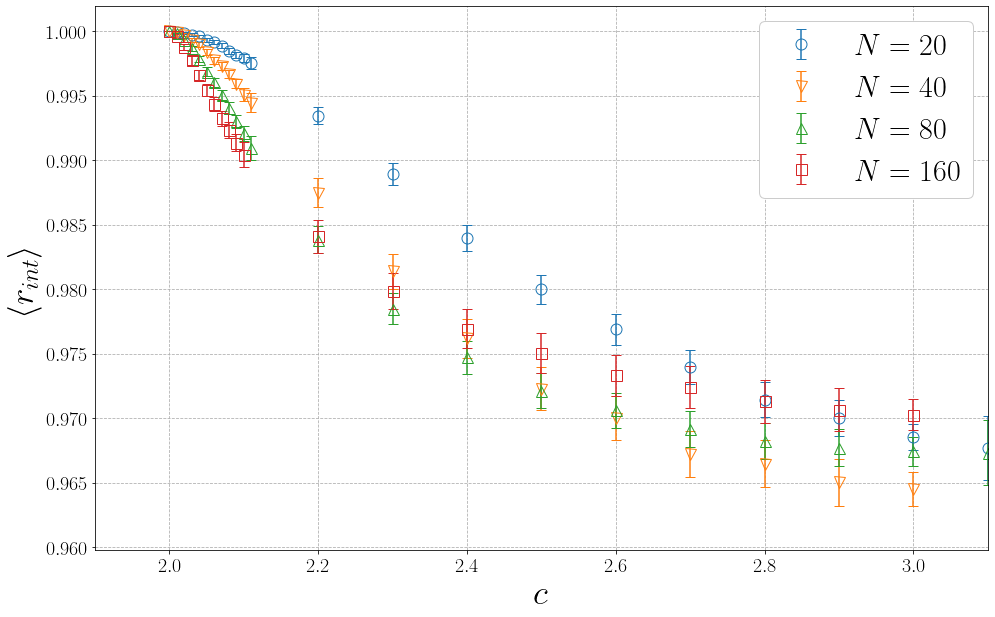

In [19]:
# Anteil ganzzahliger LP Variablen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o', 'o']
fmts = ['o', 'v', '^', 's']


for i, n in enumerate(ns):

#     ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV'], label=f"$N={n}$")
    ax.errorbar(lp_vor1[n].index, lp_vor1[n]['Anteil_GLPV'], yerr=lp_vor1[n]['Delta_Anteil_GLPV'], fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim([1.9, 3.1])
# ax.set_ylim([0.989, 1.00082])

# plt.savefig('res_80.png', dpi=300, facecolor=[1,1,1,1])
plt.savefig(os.path.join(plot_output_path, 'c_rint1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

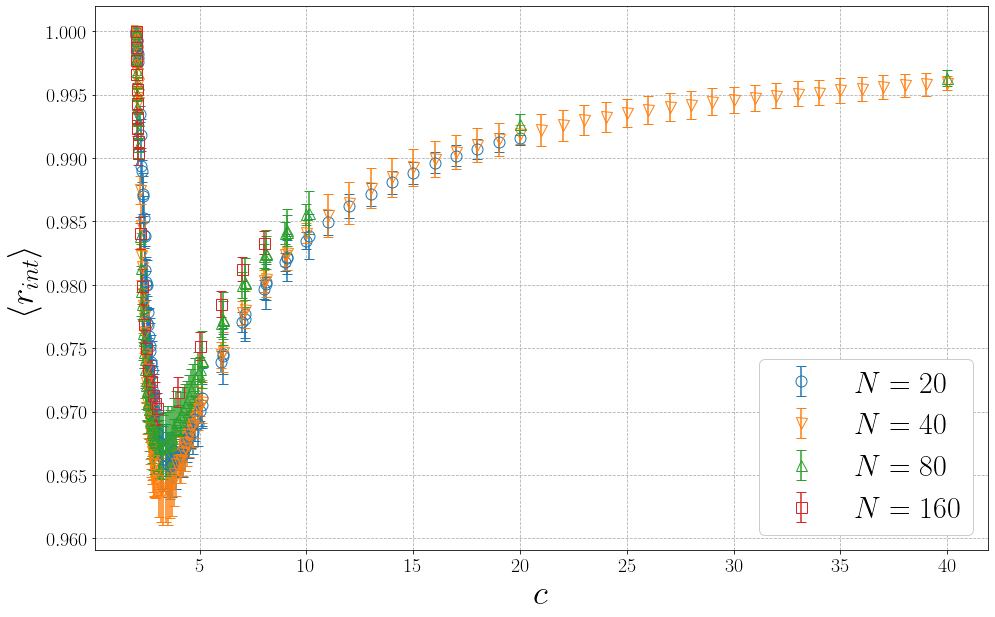

In [62]:
# Anteil ganzzahliger LP Variablen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o', 'o']
fmts = ['o', 'v', '^', 's']


for i, n in enumerate(ns):

#     ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV'], label=f"$N={n}$")
    ax.errorbar(lp_vor1[n].index, lp_vor1[n]['Anteil_GLPV'], yerr=lp_vor1[n]['Delta_Anteil_GLPV'], fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')


# plt.savefig('res_80.png', dpi=300, facecolor=[1,1,1,1])
plt.savefig(os.path.join(plot_output_path, 'c_rint1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

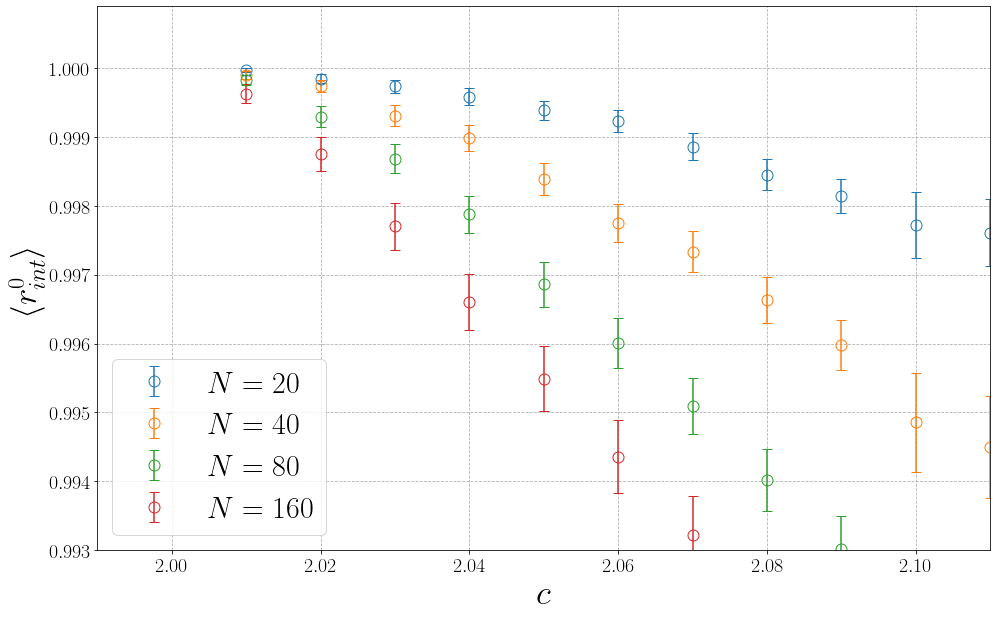

In [52]:
# Anteil ganzzahliger LP Variablen aus der ersten Stage

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o', 'o']

for i, n in enumerate(ns):
    
    if 'Delta_Anteil_GLPV0' in lp_vor1[n].columns:
    
        # subset, wo 'Anteil_GLPV0' auch vorhanden ist
        df_subset = lp_vor1[n].dropna(subset='Anteil_GLPV0')
    
        ax.errorbar(df_subset.index, df_subset['Anteil_GLPV0'], yerr=df_subset['Delta_Anteil_GLPV0'], fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int}^0 \rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30)

ax.set_xlim([1.99, 2.11])
ax.set_ylim([0.993, 1.0009])

plt.savefig(os.path.join(plot_output_path, 'c_rint0_1a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

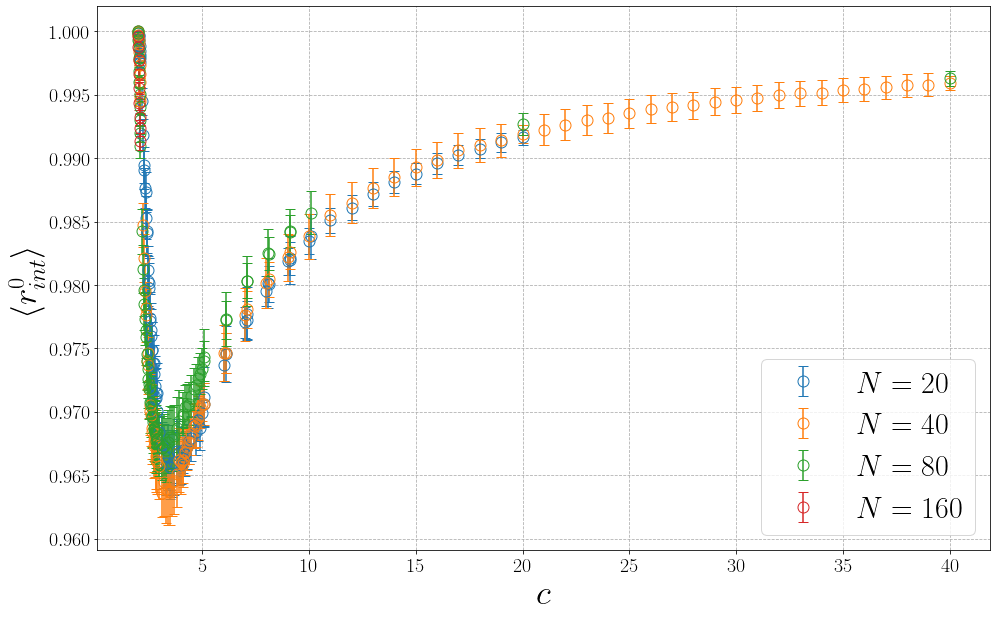

In [63]:
# Anteil ganzzahliger LP Variablen aus der ersten Stage

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o', 'o']

for i, n in enumerate(ns):
    
    if 'Delta_Anteil_GLPV0' in lp_vor1[n].columns:
    
        # subset, wo 'Anteil_GLPV0' auch vorhanden ist
        df_subset = lp_vor1[n].dropna(subset='Anteil_GLPV0')
    
        ax.errorbar(df_subset.index, df_subset['Anteil_GLPV0'], yerr=df_subset['Delta_Anteil_GLPV0'], fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int}^0 \rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30)

plt.savefig(os.path.join(plot_output_path, 'c_rint0_1b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

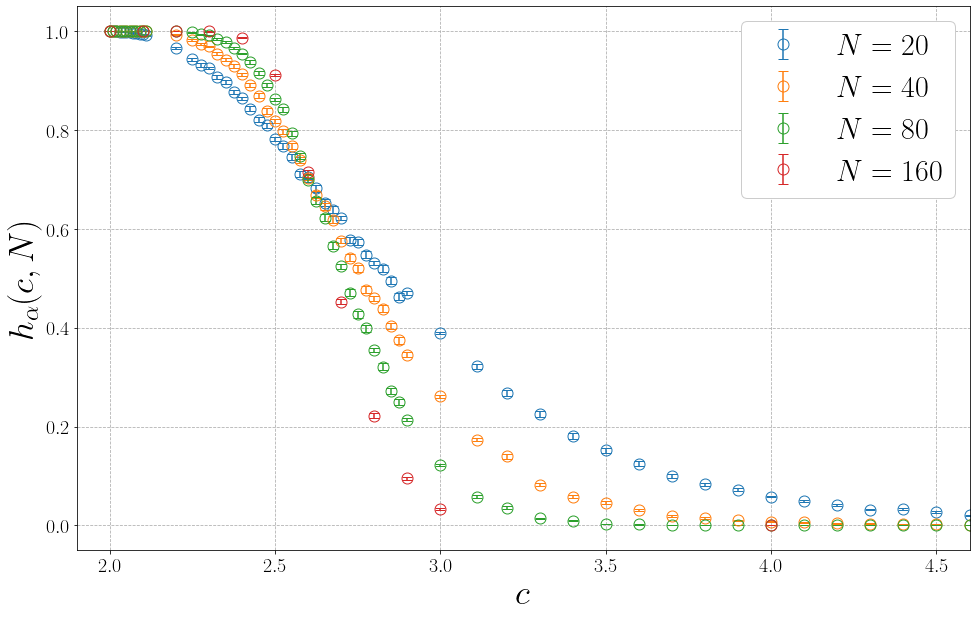

In [64]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

fmts = ['o', 'o', 'o', 'o']

for i, n in enumerate(sorted(pcs1.keys())):
    
    if n != 120:
        ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')
#     ax.scatter(pcs1[n].ids, pcs1[n].props)

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(f'$h_\\alpha(c, N)$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0.295, 0.805])
# ax.text(0.45, 0.02, f"Greedy, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)
# alpha = 1.2
# ax.set_xlim([0.6,.66])
# ax.set_ylim([0.8, 1.02])

# alpha = 1.1
ax.set_xlim([1.9, 4.6])
# ax.set_ylim([0.4, 0.8])

plt.savefig(os.path.join(plot_output_path, f'greedy_h_{alpha}_1.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

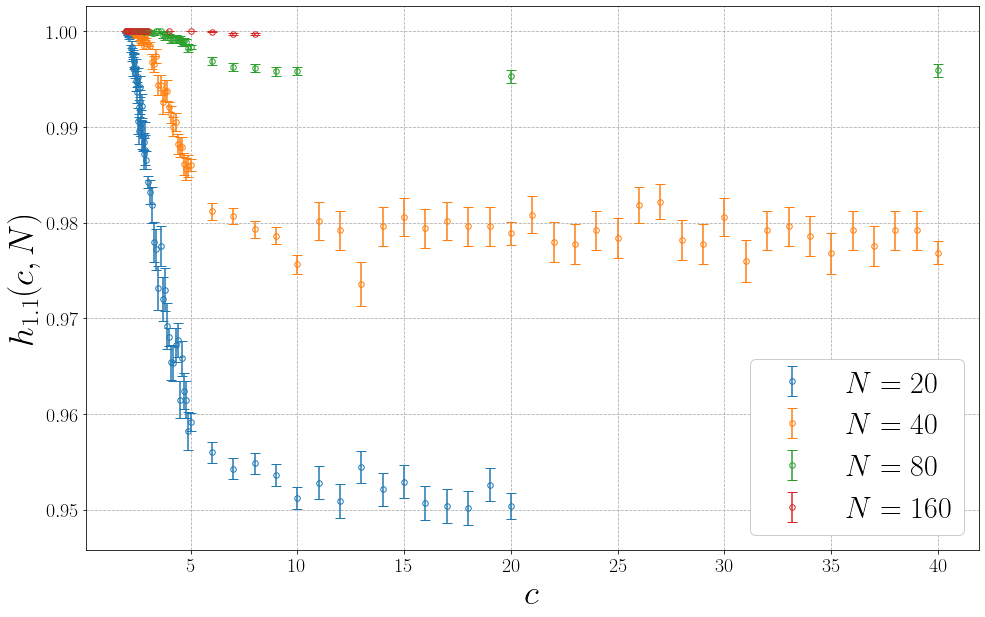

In [65]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.1
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

fmts = ['.', '.', '.', '.']

for i, n in enumerate(sorted(pcs1.keys())):
    
    if n != 120:
        ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')
#     ax.scatter(pcs1[n].ids, pcs1[n].props)

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(f'$h_{{{alpha}}}(c, N)$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0.295, 0.805])
# ax.text(0.45, 0.02, f"Greedy, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)
# alpha = 1.2
# ax.set_xlim([0.6,.66])
# ax.set_ylim([0.8, 1.02])

# alpha = 1.1
# ax.set_xlim([0.53, 0.58])
# ax.set_ylim([0.4, 0.8])

plt.savefig(os.path.join(plot_output_path, f'lp_h_{alpha}_1.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [106]:
# die Daten fuer fssa abspeichern

from functools import reduce

def prepare_fssa(ls, pcs, ordnername):
    
    p = os.path.join(r'D:\Uni\Masterarbeit\Daten\fssa', ordnername)
    
    # kann nur id werte nehmen, die fuer alle L vorliegen
    common_ids = sorted(reduce(lambda a, b : a.intersection(b), [set(pcs[l].ids) for l in ls]))
    
    # a und da bauen
    al = []
    dal = []
    
    for l in ls:
        # gehe alle eigenen IDs durch und fuege zum selben Index die entsprechenden Werte (props, std_dev) hinzu, falls
        # die id auch in den common_ids vorkommt, sonst nicht
        al.append([pcs[l].props[i] for i, ii in enumerate(pcs[l].ids) if ii in common_ids])
        dal.append([pcs[l].std_dev[i] for i, ii in enumerate(pcs[l].ids) if ii in common_ids])
        
    # alles abspeichern
    np.savetxt(os.path.join(p, 'l.txt'),  np.array(sorted(ls)))
    np.savetxt(os.path.join(p, 'rho.txt'),  np.array(sorted(common_ids)))
    
    np.savetxt(os.path.join(p, 'a.txt'), np.array(al))
    np.savetxt(os.path.join(p, 'da.txt'), np.array(dal))
    
    print(common_ids)

In [110]:
# fss fuer greedy und alpha=1.2
alpha=1.2
alg='Greedy'
pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

ls = [20, 40, 80, 160]

prepare_fssa(ls, pcs1, f'Graphstruktur/{alg}_{alpha}_1_scenario')

[2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


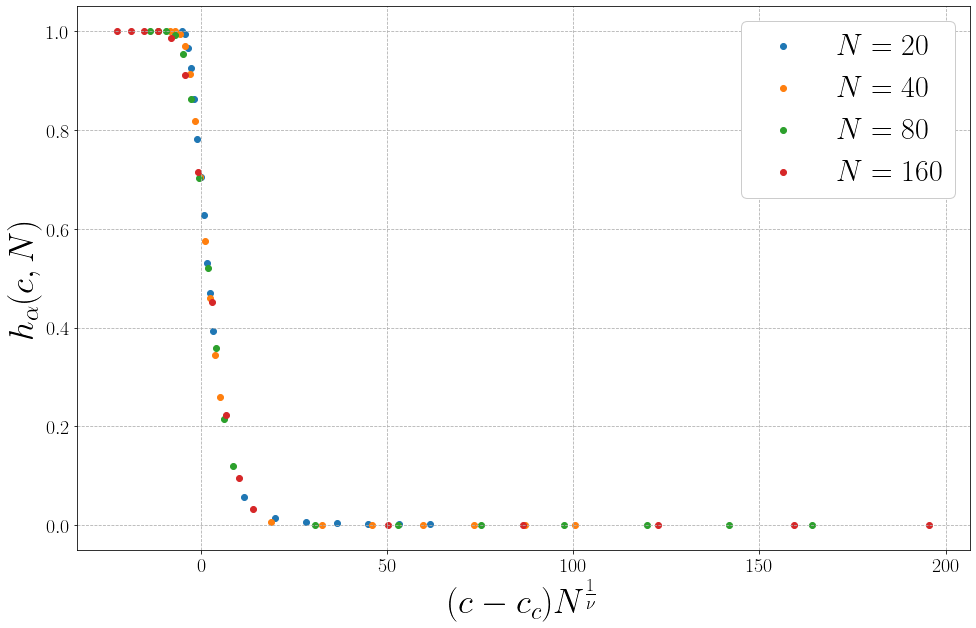

In [119]:
fig, ax = plt.subplots(figsize=(16,10))
# 1.0, 20, 40, 80
nu = 1.4125462215718967
zeta = -0.04080018145342616
krit = 2.619804818587977

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
#     if n >= 320:
#     ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) * n ** (-1 * zeta/nu) , label=f'N={n}')
        ax.scatter((np.array(pcs1[n].ids) - krit) * n ** (1 / nu), np.array(pcs1[n].props) , label=f'$N={n}$')
    
ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
ax.set_xlabel(r"$(c - c_{c}) N^{\frac{1}{\nu}}$", fontsize=axislabelsize)
ax.set_ylabel(r"$h_{\alpha}(c,N)$", fontsize=axislabelsize)
# ax.set_ylabel(r"$p(p_k,N)$", fontsize=18)
# ax.set_xlim((-8.1, 4.1))

plt.savefig(os.path.join(plot_output_path, f'greedy_collaps_1.2_1.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

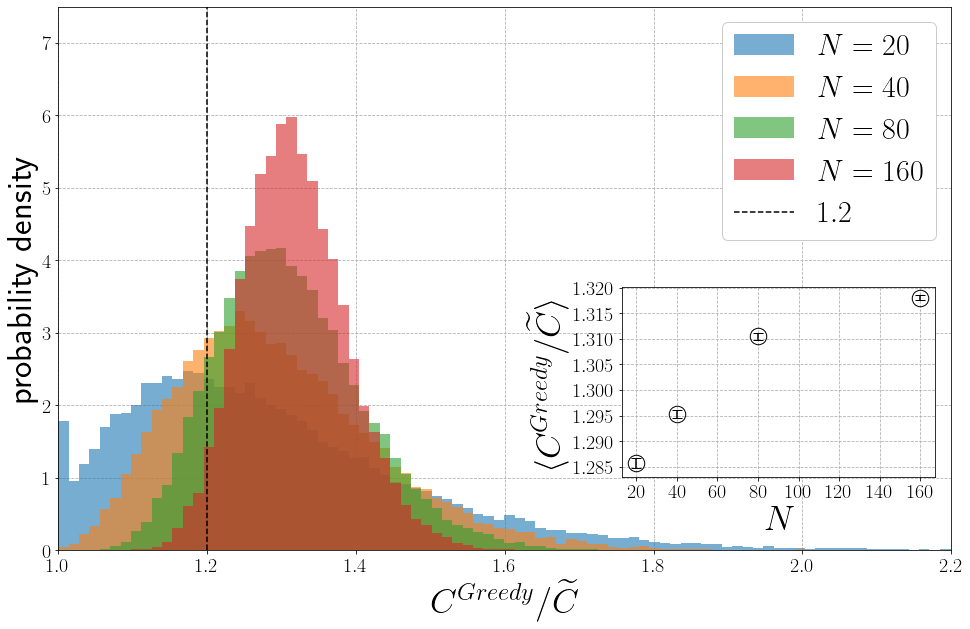

In [66]:
ns = [20, 40, 80, 160]
l = [data_vor1[n] for n in ns]

# for r in l:
#     print(r.id_values)

inaxislabelsize = 20

ms, smes, ax = auswertung_ma.plot_hist_alg_vs_schranke(l, ns, 'Greedy', 3., xlim_max=2.2, density=True)

axins = inset_axes(ax, width='35%', height='35%', loc=4, borderpad=3, bbox_to_anchor=(0.015,0.08,1,1), bbox_transform=ax.transAxes)
axins.errorbar(ns, ms, yerr=smes, fmt='o', c='black', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor)
axins.set_xlabel('$N$', fontsize=axislabelsize)
axins.set_ylabel('$\\langle C^{Greedy} / \\widetilde{C} \\rangle$', fontsize=axislabelsize)
for label in (axins.get_xticklabels() + axins.get_yticklabels()):
    label.set_fontsize(label_fontsize)
# axins.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='LP-Approx, only cut-constraints')
# axins.errorbar(mr.index, mr['Greedy'], yerr=sme['Greedy'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='LP-Approx, only cut-constraints')
# axins.set_xlim((1.985, 2.115))
# axins.set_ylim((246, 267))
axins.grid(ls='--')
axins.set_axisbelow(True)

ax.vlines(1.2, 0, 19., color='black', linestyles='dashed', label='$1.2$')

ax.set_axisbelow(True)

ax.set_ylim(0, 7.5)

ax.set_xlabel('$C^{Greedy} / \widetilde{C}$', fontsize=axislabelsize)
ax.set_ylabel(f'probability density', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, f'pdf_greedy_1_3.0.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

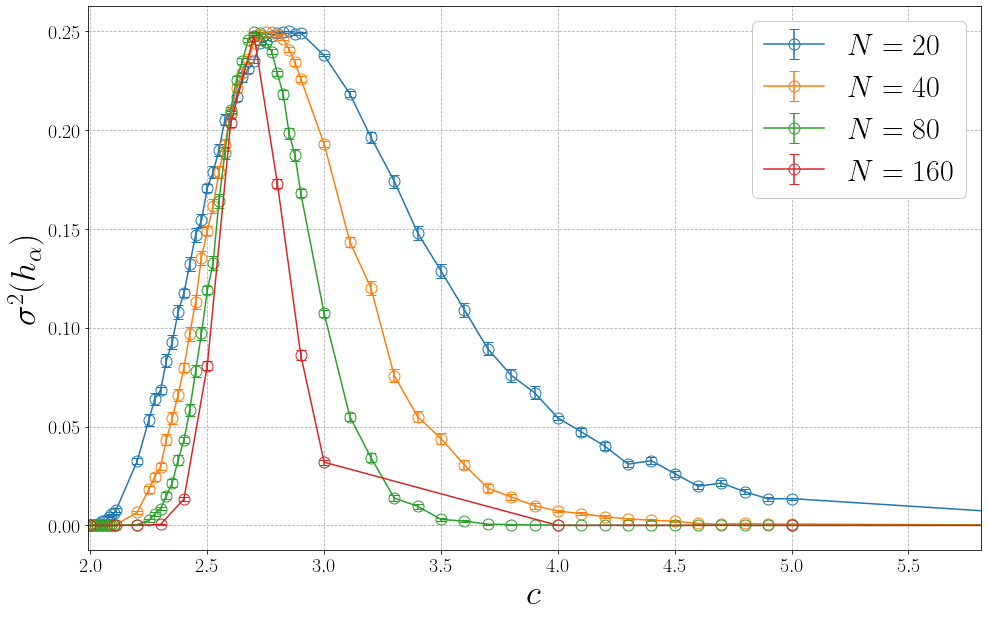

In [111]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].var, yerr=pcs1[n].delta_var, fmt='o-', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')
#     ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(f'$\\sigma^2(h_\\alpha)$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
ax.legend(fontsize=30, framealpha=1)

ax.set_xlim([1.99, 5.81])
plt.savefig(os.path.join(plot_output_path, f'var_greedy_1_1.2.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [69]:
from scipy.optimize import curve_fit
def gauss(x, x_max, A, B):
    return A * np.exp(-1 * (x - x_max) ** 2 / B)

In [70]:
# lege Intervalle fest innerhalb welcher ich den gauss fit machen will
ints = {20: [2.2,3.2], 40: [2.5, 3.], 80: [2.5, 3.], 160: [2.4, 2.8]}

 N = 20; Max: 2.8593817092127263, +- 0.006757887089081995
 N = 40; Max: 2.776302185875459, +- 0.0030358100483303617
 N = 80; Max: 2.7232551679642008, +- 0.002992273500500727
 N = 160; Max: 2.6873717398086456, +- 0.005527615822086671


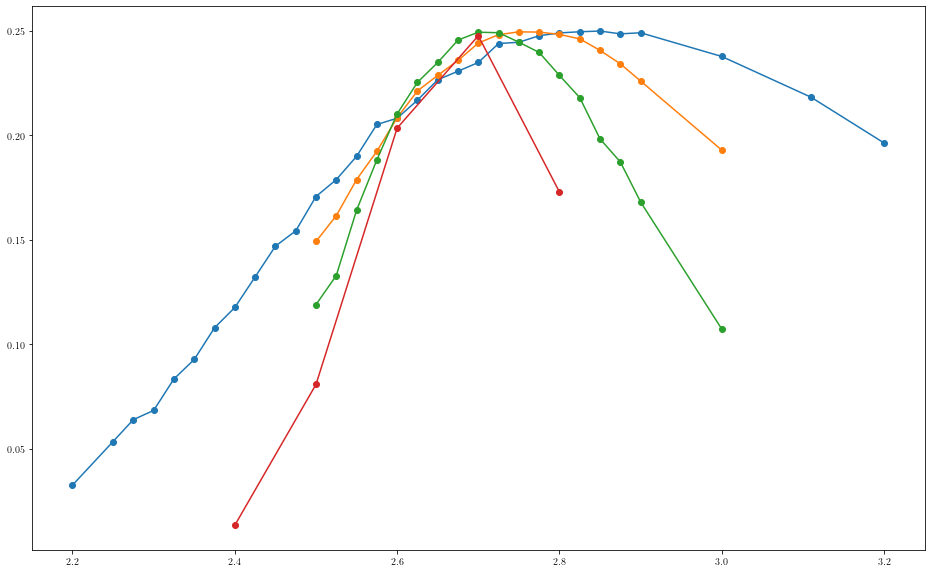

In [82]:
alpha=1.2
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

popts = []
delta_popts = []

fig, ax = plt.subplots(figsize=(16,10))
for n in [20, 40, 80, 160]:#, 80, 160, 320, 640, 1280, 2560]:
    indices = (ints[n][0] <= np.array(pcs1[n].ids)) & (np.array(pcs1[n].ids) <= ints[n][1])
    ii, vv = np.array(pcs1[n].ids)[indices], np.array(pcs1[n].var)[indices]
    dd = np.array(pcs1[n].delta_var)[indices]
    ax.plot(ii, vv, 'o-', label=f"$N={n}$")
    
    popt, pcov = curve_fit(gauss, ii, vv, sigma=dd, maxfev=100000)
    
    popts.append(popt[0])
    delta_popts.append(np.sqrt(np.diag(pcov))[0])
    
    print(f" N = {n}; Max: {popt[0]}, +- {np.sqrt(np.diag(pcov))[0]}")

In [78]:
def var_fit(N, xkrit, b, nu):
    return xkrit + b * N ** (-1/nu)

In [85]:
popt, pcov = curve_fit(var_fit, np.array([20, 40, 80, 160]), np.array(popts), sigma=np.array(delta_popts), maxfev=100000)

In [86]:
popt

array([2.62260456, 1.50874958, 1.61636542])

In [109]:
np.sqrt(np.diag(pcov))

array([0.00522974, 0.08230803, 0.06299241])

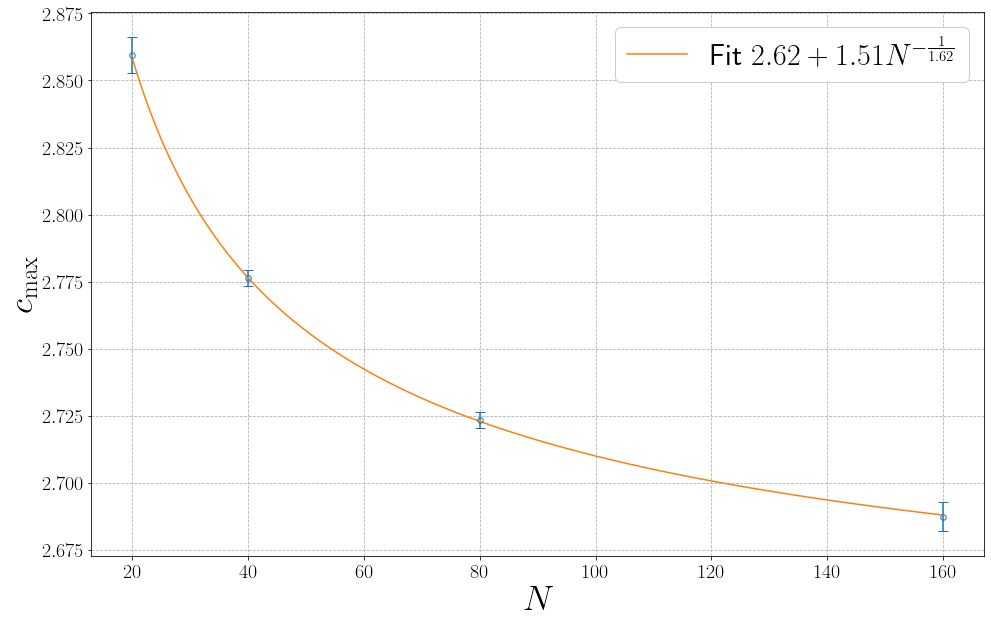

In [112]:
fig, ax = plt.subplots(figsize=(16,10))

ns = [20, 40, 80, 160]

fmts = ['.', '.', '.', '.']

# for i, n in enumerate(ns):
    
ax.errorbar(ns, popts, yerr=delta_popts, fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor)

ns2 = np.linspace(20, 160, 1000)

ax.plot(ns2, var_fit(ns2, *popt), label=f'Fit ${popt[0]:.3} + {popt[1]:.3} N^{{-\\frac{1}{{{popt[2]:.3}}}}}$')

ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(f'$c_{{\\max}}$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([0.295, 0.805])
# ax.text(0.45, 0.02, f"Greedy, $\\alpha={alpha}$", color="black", bbox=dict(fc='None', alpha=.5, boxstyle='round', color='grey'), fontsize=40)
# alpha = 1.2
# ax.set_xlim([0.6,.66])
# ax.set_ylim([0.8, 1.02])

# alpha = 1.1
# ax.set_xlim([0.53, 0.58])
# ax.set_ylim([0.4, 0.8])

plt.savefig(os.path.join(plot_output_path, f'cmax_greedy_1_1.2.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

In [1]:
data_vor1[160].calc_statistic_size()

NameError: name 'data_vor1' is not defined

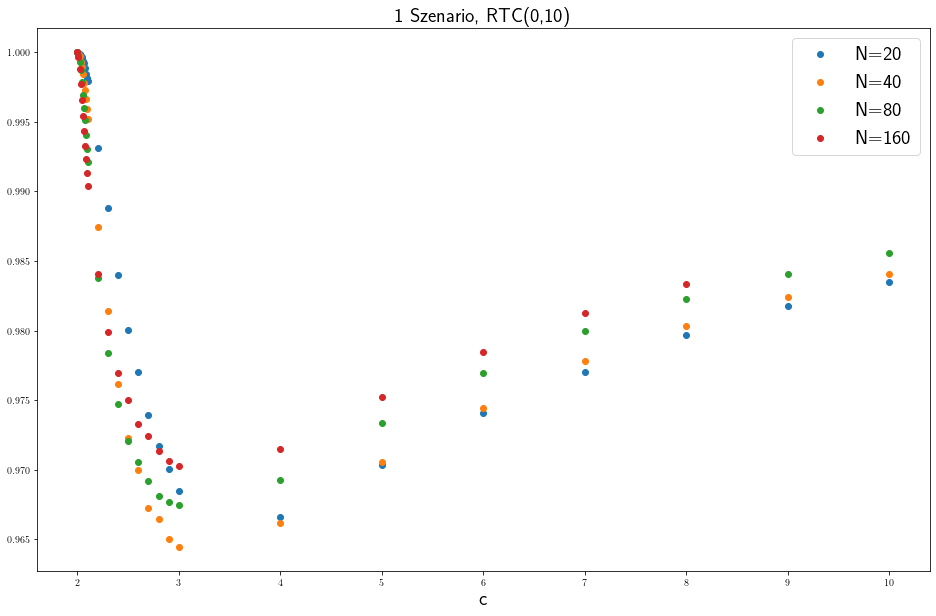

In [10]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(lp_vor1.keys()):

    ax.scatter(lp_vor1[n].index, lp_vor1[n]['Anteil_GLPV'], label=f'N={n}')

ax.set_xlabel('c', fontsize=20)
# ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('1 Szenario, RTC(0,10)', fontsize=20)
ax.legend(fontsize=20)

In [ ]:
# NEUNEUNEU, DARAUF AUFBAUEN 
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in dic_lp:
    
    ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GGL'], label=f"$N={n}$")

ax.set_xlabel('$p_e$', fontsize=axislabelsize)
ax.set_ylabel(r'Anteil ganz geloester Probleminstanzen', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.grid(ls='--')

# ax.set_xlim([0, 0.3])
# ax.set_ylim([0.95, 1.01])

# plt.savefig('res_80.png', dpi=300, facecolor=[1,1,1,1])

KeyError: 'Anteil_LPV0'

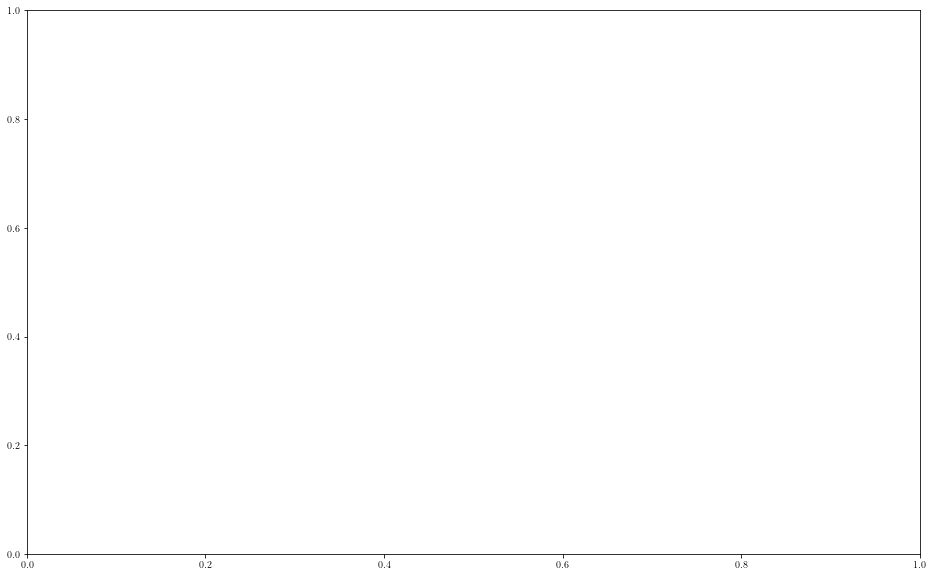

In [12]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(lp_vor1.keys()):

    ax.errorbar(lp_vor1[n].index, lp_vor1[n]['Anteil_LPV0'], lp_vor1['Delta_Anteil_LPV0'], label=f'N={n}')

ax.set_xlabel('c', fontsize=20)
# ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('1 Szenario, RTC(0,10)', fontsize=20)
ax.legend(fontsize=20)

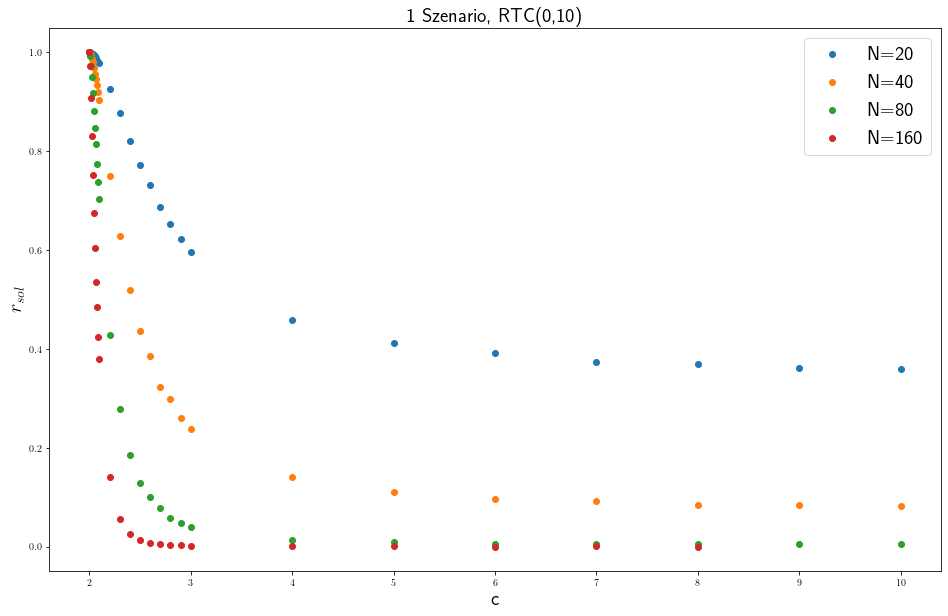

In [13]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(lp_vor1.keys()):

    ax.scatter(lp_vor1[n].index, lp_vor1[n]['Anteil_GGL'], label=f'N={n}')

ax.set_xlabel('c', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('1 Szenario, RTC(0,10)', fontsize=20)
ax.legend(fontsize=20)

Text(0, 0.5, 'Anteil aller Problemstellungen bei denen LP_Approx 1.02 $\\cdot$ Schranke4b unterbietet')

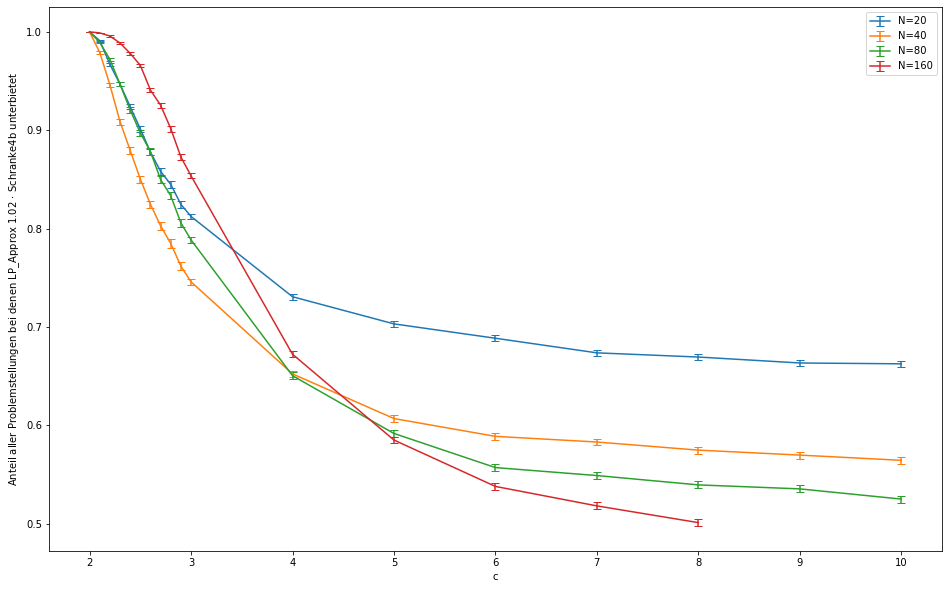

In [10]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.02
alg='LP_Approx'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('c')
ax.set_ylabel(f'Anteil aller Problemstellungen bei denen LP_Approx {alpha} $\cdot$ Schranke4b unterbietet')

# ax.set_xlim([0.615,.65])
# ax.set_ylim([0.86, 0.91])

# ax.set_xlim([0.55,.71])
# ax.set_ylim([0.84, 0.99])

# plt.savefig('pk_uebergang_lp.png')

Der LP_Approximationsalg wird besser, wenn das Problem groesser wird und wenn alpha gross genug gesetzt wird. Das kann aber an dem Alpha liegen

Text(0, 0.5, 'Anteil aller Problemstellungen bei denen Greedy 1.2 $\\cdot$ Schranke4b erreicht')

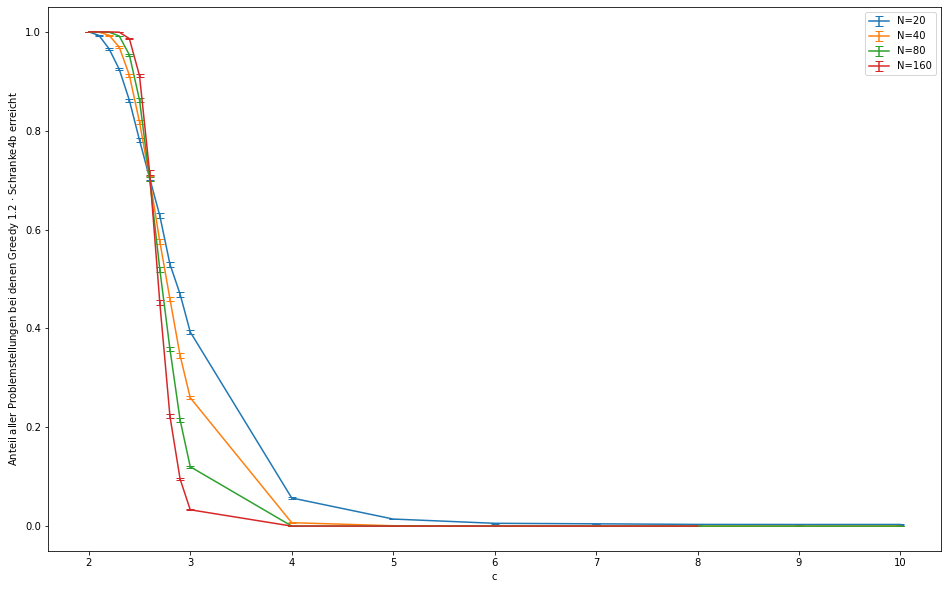

In [108]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

pcs1 = auswertung_ma.prepare_alg_vs_schranke_data({}, data_vor1, alg, alpha)

for n in sorted(pcs1.keys()):
    
    ax.errorbar(pcs1[n].ids, pcs1[n].props, yerr=pcs1[n].std_dev, capsize=4, label=f'N={n}')
    
ax.legend()

ax.set_xlabel('c')
ax.set_ylabel(f'Anteil aller Problemstellungen bei denen Greedy {alpha} $\cdot$ Schranke4b erreicht')

# ax.set_xlim([1.9,4.2])
# ax.set_ylim([0.8, 1.02])

# ax.set_xlim([0.62, 0.66])
# ax.set_ylim([0.5, .9])

# plt.savefig('pk_uebergang_lp.png')

(1.9, 3.1)

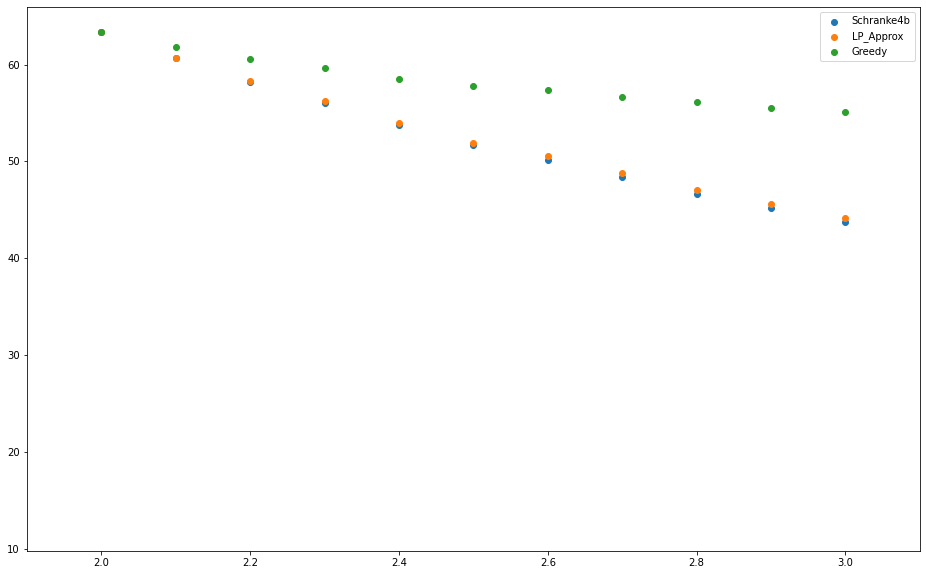

In [27]:
fig, ax = plt.subplots(figsize=(16, 10))

d20_alg_results = data_vor1[20].calc_mean_alg_results()
for alg in d20_alg_results.columns:
    ax.scatter(d20_alg_results.index, d20_alg_results[alg], label=alg)
ax.legend()
ax.set_xlim([1.9, 3.1])

(1.9, 3.1)

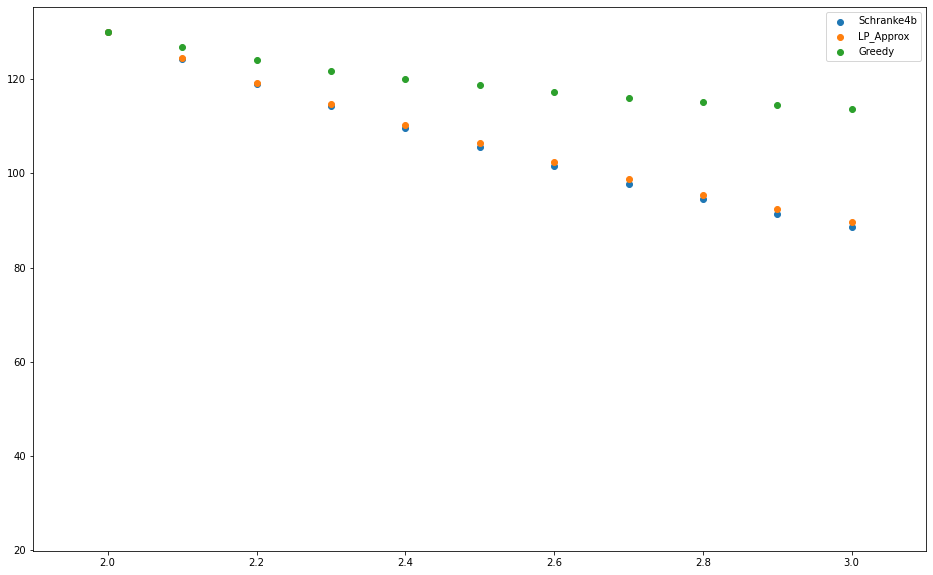

In [26]:
fig, ax = plt.subplots(figsize=(16, 10))

d40_alg_results = data_vor1[40].calc_mean_alg_results()
for alg in d40_alg_results.columns:
    ax.scatter(d40_alg_results.index, d40_alg_results[alg], label=alg)
ax.legend()
ax.set_xlim([1.9, 3.1])

(1.9, 3.1)

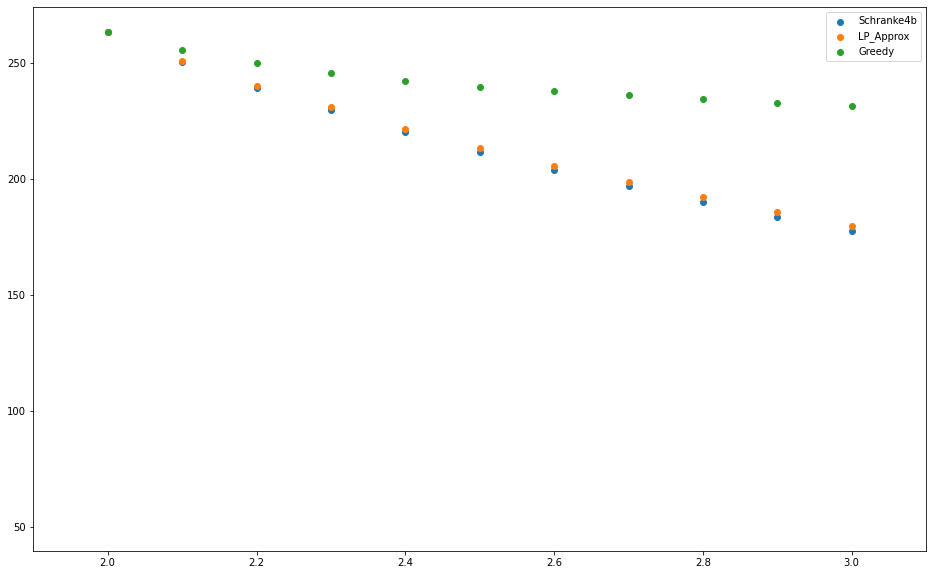

In [25]:
fig, ax = plt.subplots(figsize=(16, 10))

d80_alg_results = data_vor1[80].calc_mean_alg_results()
for alg in d80_alg_results.columns:
    ax.scatter(d80_alg_results.index, d80_alg_results[alg], label=alg)
ax.legend()
ax.set_xlim([1.9, 3.1])

(1.9, 3.1)

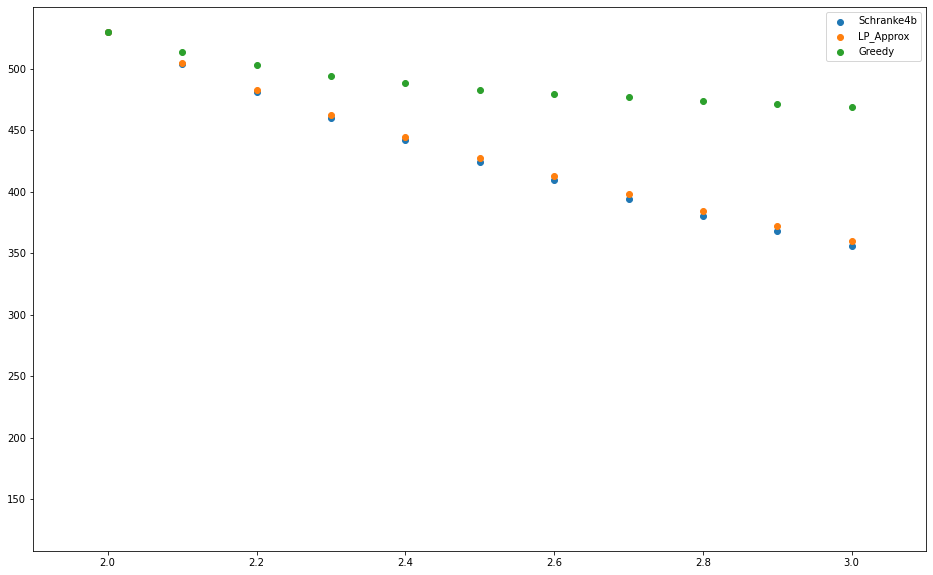

In [24]:
fig, ax = plt.subplots(figsize=(16, 10))

d160_alg_results = data_vor1[160].calc_mean_alg_results()
for alg in d160_alg_results.columns:
    ax.scatter(d160_alg_results.index, d160_alg_results[alg], label=alg)
ax.legend()
ax.set_xlim([1.9, 3.1])

In [34]:
d20_alg_results['Greedy'] / d20_alg_results['Schranke4b']

ids
2.0     1.000000
2.1     1.020137
2.2     1.041603
2.3     1.064340
2.4     1.088999
2.5     1.117836
2.6     1.143777
2.7     1.171653
2.8     1.204684
2.9     1.229867
3.0     1.261169
4.0     1.562227
5.0     1.790770
6.0     1.936545
7.0     2.027727
8.0     2.073553
9.0     2.102397
10.0    2.111390
dtype: float64

In [33]:
d160_alg_results['Greedy'] / d160_alg_results['Schranke4b']

ids
2.0    1.000000
2.1    1.020555
2.2    1.044950
2.3    1.073639
2.4    1.104471
2.5    1.137587
2.6    1.172103
2.7    1.208722
2.8    1.245021
2.9    1.279927
3.0    1.314970
4.0    1.601126
5.0    1.793232
6.0    1.916922
7.0    1.995907
8.0    2.045474
dtype: float64

In [64]:
data_vor1[20]

20
40
80
160


Text(0, 0.5, 'Verhältnis der Mittelwerte Greedy/Schranke4b')

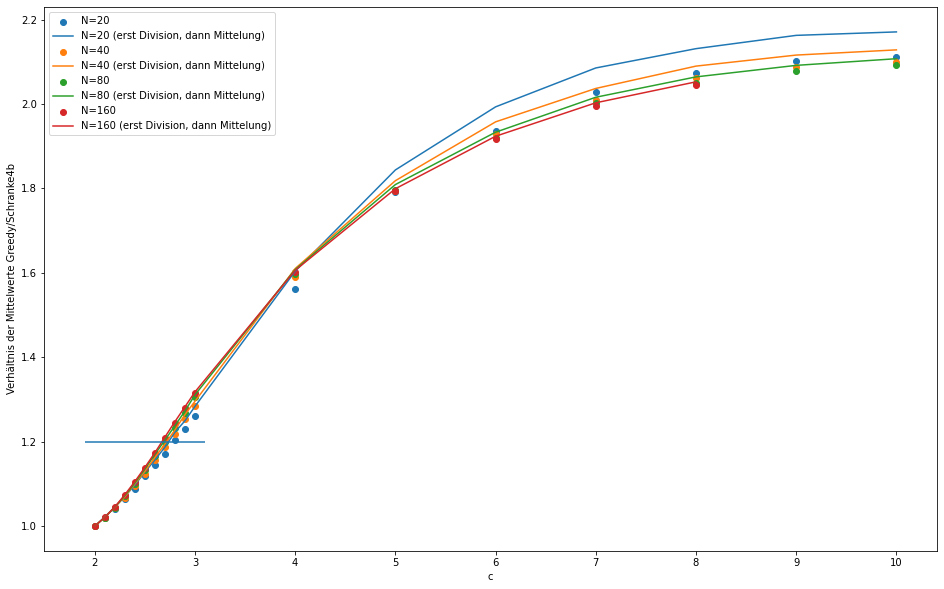

In [107]:
fig, ax = plt.subplots(figsize=(16,10))

l = [d20_alg_results, d40_alg_results, d80_alg_results, d160_alg_results]
labs = [20, 40, 80, 160]

for i in range(len(l)):
    s = l[i]['Greedy'] / l[i]['Schranke4b']
    ax.scatter(s.index, s, label=f'N={labs[i]}')
    
    print(labs[i])
    
    mean_v = [(data_vor1[labs[i]].raw_results[j]['Greedy'] / data_vor1[labs[i]].raw_results[j]['Schranke4b']).mean() for j in data_vor1[labs[i]].id_values]
    ax.plot(data_vor1[labs[i]].id_values, mean_v, label=f'N={labs[i]} (erst Division, dann Mittelung)')
    
ax.legend()
ax.hlines(1.2, 1.9, 3.1)
ax.set_xlabel('c')
ax.set_ylabel('Verhältnis der Mittelwerte Greedy/Schranke4b')
# ax.set_xlim((1.9,3.1))
# ax.set_ylim((0.99, 1.41))

Im Bereich des Schnittpunktes bei zB. alpha=1.2 gilt: Das Verhältnis der Mittelwerte von Greedy und Schranke4b ist für große N näher an dem alpha dran als für kleine N. Passt das mit dem Anteil an Problemstellungen zusammen, wo Greedy/Schranke4b <= alpha sein muss?

ACHTUNG: Hier gibt es ja auch einen Übergang!

Wenn ich erst teile und dann mittle, kommt fast das selbe raus.

In [92]:
print('Anteil aller Problemstellungen, wo Greedy für c=2.5 unter 1.2 * Schranke4b liegt:')
print('N=20: ', ((data_vor1[20].raw_results[2.5]['Greedy'] / data_vor1[20].raw_results[2.5]['Schranke4b']) < 1.2).sum() / 10000)
print('N=160: ', ((data_vor1[160].raw_results[2.5]['Greedy'] / data_vor1[160].raw_results[2.5]['Schranke4b']) < 1.2).sum() / 10000)
print()
print('Mittleres Verhältnis Greedy/Schranke4b')
print('N=20: ', (data_vor1[20].raw_results[2.5]['Greedy'] / data_vor1[20].raw_results[2.5]['Schranke4b']).mean())
print('N=160: ', (data_vor1[160].raw_results[2.5]['Greedy'] / data_vor1[160].raw_results[2.5]['Schranke4b']).mean())

Anteil aller Problemstellungen, wo Greedy für c=2.5 unter 1.2 * Schranke4b liegt:
N=20:  0.7808
N=160:  0.9114

Mittleres Verhältnis Greedy/Schranke4b
N=20:  1.128239855591513
N=160:  1.1390505950680867


Das heisst, es muss fuer c=20 extremere Werte geben oder? der mittelwert ist kleiner als fuer c=160, aber es muss ja mehr Problemstellungen geben, wo das Ergebnis vom Greedyalg ueber der Schranke drueber liegt

Histogramm time!

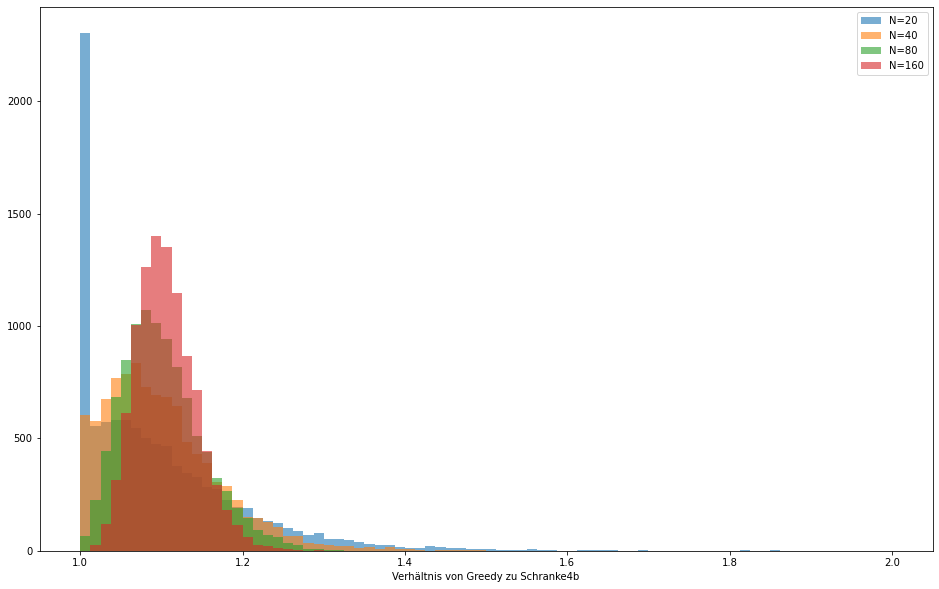

In [118]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(data_vor1[20].raw_results[2.4]['Greedy'] / data_vor1[20].raw_results[2.4]['Schranke4b'], bins=80, range=(1,2), label='N=20', alpha=.6)
ax.hist(data_vor1[40].raw_results[2.4]['Greedy'] / data_vor1[40].raw_results[2.4]['Schranke4b'], bins=80, range=(1,2), label='N=40', alpha=.6)
ax.hist(data_vor1[80].raw_results[2.4]['Greedy'] / data_vor1[80].raw_results[2.4]['Schranke4b'], bins=80, range=(1,2), label='N=80', alpha=.6)

ax.hist(data_vor1[160].raw_results[2.4]['Greedy'] / data_vor1[160].raw_results[2.4]['Schranke4b'], bins=80, range=(1,2),label='N=160', alpha=.6)
ax.set_xlabel("Verhältnis von Greedy zu Schranke4b")
# ax.set_xlim(0.99, 2.01)
ax.legend()

Ich erkenne, dass der Greedy alg für c=2.4 und N=20 häufig noch sehr nahe an der Schranke4b dran ist, aber dafür auch stärkere Abweichungen vorkommen. Also die Ergebnisse machen schon so Sinn. Im Mittel ist der Greedy-Alg für kleine N vllt sogar besser, aber für grosse N kann man sagen, dass links vom krit. Pkt (fast) alle Problemstellungen von Greedy so gelöst werden, dass sie nicht schlechter als 1.2 mal den Schrankenwert sind

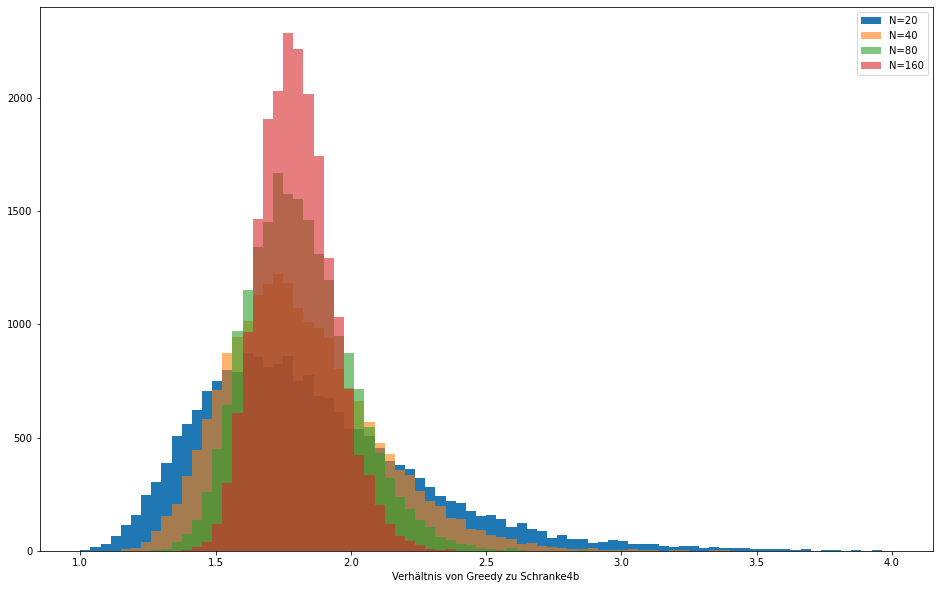

In [116]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.hist(data_vor1[20].raw_results[5.]['Greedy'] / data_vor1[20].raw_results[5.]['Schranke4b'], bins=80, range=(1,4), label='N=20')
ax.hist(data_vor1[40].raw_results[5.]['Greedy'] / data_vor1[40].raw_results[5.]['Schranke4b'], bins=80, range=(1,4), label='N=40', alpha=.6)
ax.hist(data_vor1[80].raw_results[5.]['Greedy'] / data_vor1[80].raw_results[5.]['Schranke4b'], bins=80, range=(1,4), label='N=80', alpha=.6)

ax.hist(data_vor1[160].raw_results[5.]['Greedy'] / data_vor1[160].raw_results[5.]['Schranke4b'], bins=80, range=(1,4),label='N=160', alpha=.6)
ax.set_xlabel("Verhältnis von Greedy zu Schranke4b")
# ax.set_xlim(0.99, 2.01)
ax.legend()

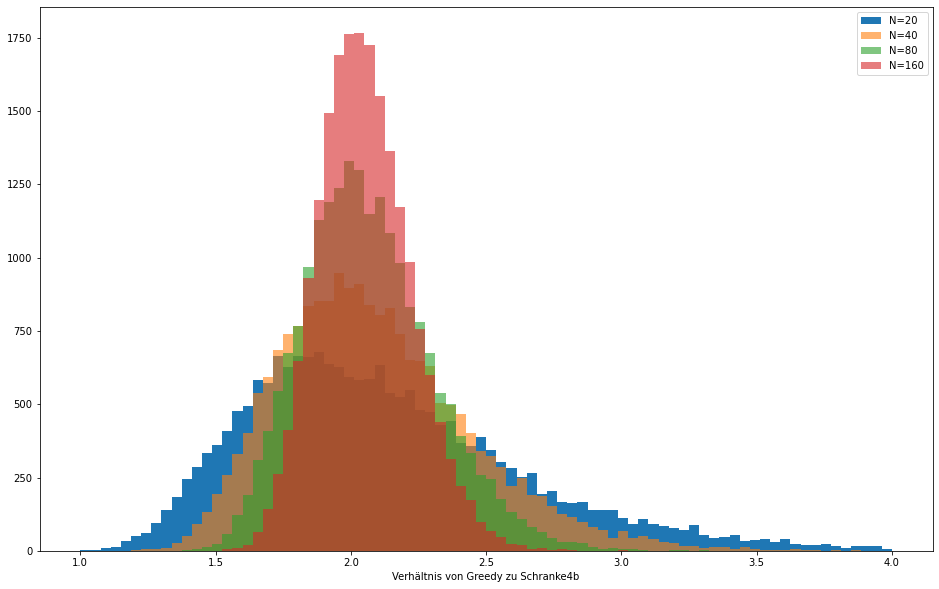

In [120]:
fig, ax = plt.subplots(figsize=(16, 10))
c = 8.0
ax.hist(data_vor1[20].raw_results[c]['Greedy'] / data_vor1[20].raw_results[c]['Schranke4b'], bins=80, range=(1,4), label='N=20')
ax.hist(data_vor1[40].raw_results[c]['Greedy'] / data_vor1[40].raw_results[c]['Schranke4b'], bins=80, range=(1,4), label='N=40', alpha=.6)
ax.hist(data_vor1[80].raw_results[c]['Greedy'] / data_vor1[80].raw_results[c]['Schranke4b'], bins=80, range=(1,4), label='N=80', alpha=.6)
ax.hist(data_vor1[160].raw_results[c]['Greedy'] / data_vor1[160].raw_results[c]['Schranke4b'], bins=80, range=(1,4),label='N=160', alpha=.6)
ax.set_xlabel("Verhältnis von Greedy zu Schranke4b")
# ax.set_xlim(0.99, 2.01)
ax.legend()

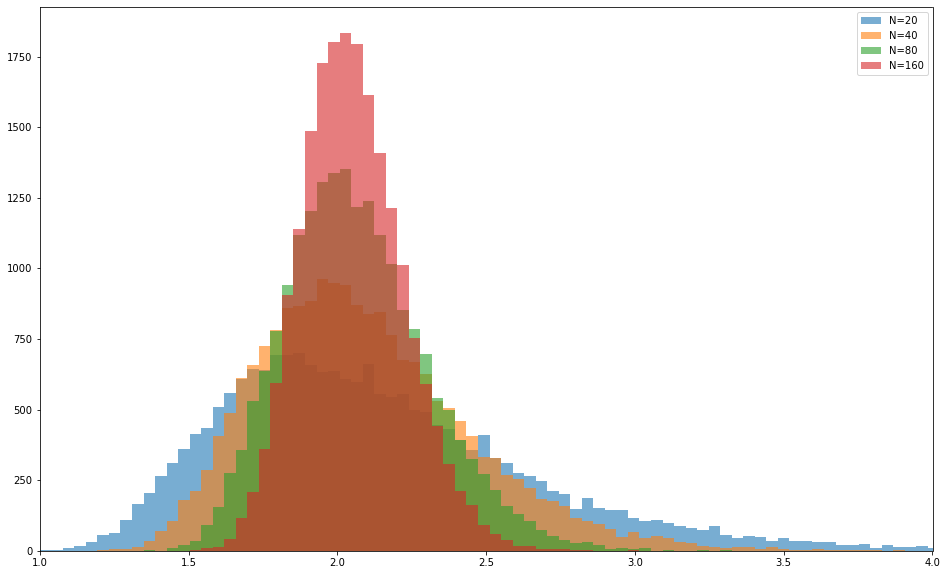

In [3]:
ns = [20, 40, 80, 160]
auswertung_ma.plot_hist_alg_vs_schranke([data_vor1[i] for i in ns], ns, 'Greedy', 8.)

# 5 scenarios

In [120]:
# lese die vorausgewerteten Daten ein
p5 = r'D:\Uni\Masterarbeit\Daten\Graphstruktur\5_scenarios\Vorauswertung'
data_vor5, lp_vor5 = auswertung_ma.read_vorauswertung(p5, id='c', id_stelle=1, read_lp=True)

ns = sorted(data_vor5.keys())
mr, sme = data_vor5[40].calc_mean_alg_results()

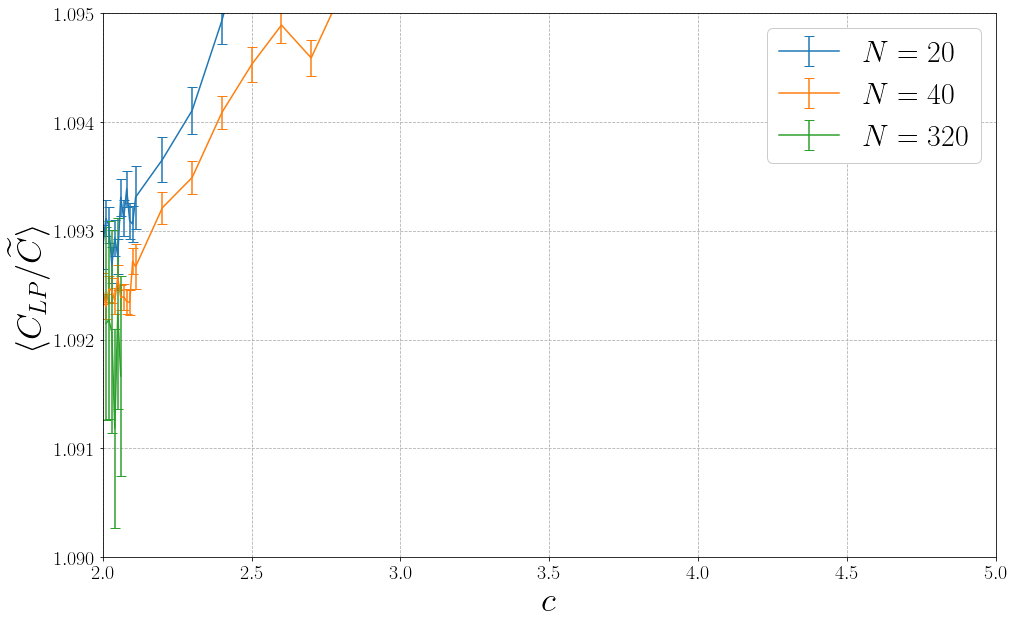

In [175]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'LP_Approx'

for l in sorted(data_vor5.keys()):
    
    ii = []
    mean_vhs = []
    delta_vhs = []

    for i in data_vor5[l].id_values:
            
        if alg in data_vor5[l].raw_results[i].columns:

            ii.append(i)
            
            subset = data_vor5[l].raw_results[i].dropna(subset=alg)    

            vh = subset[alg] / subset['Schranke4b']

            mean_vhs.append(vh.mean())
            delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

    ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
   
# ax.set_xlim((2,9))
# ax.set_ylim((1.08, 1.15))

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{LP} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim((2,5))
ax.set_ylim((1.09, 1.095))

plt.savefig(os.path.join(plot_output_path, 'clp_durch_bound_5a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

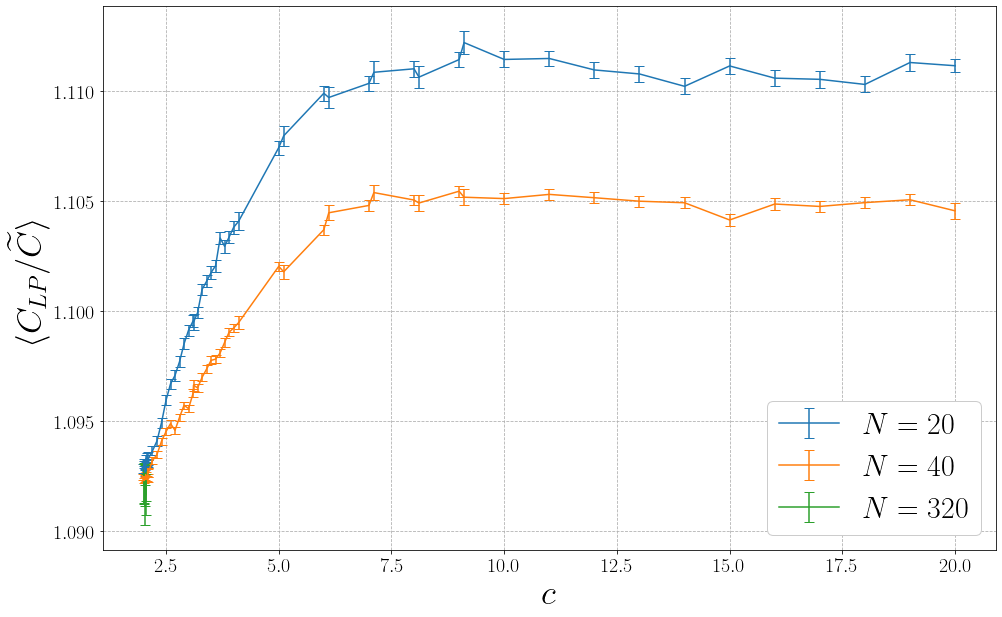

In [176]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'LP_Approx'

for l in sorted(data_vor5.keys()):
    
    ii = []
    mean_vhs = []
    delta_vhs = []

    for i in data_vor5[l].id_values:
            
        if alg in data_vor5[l].raw_results[i].columns:

            ii.append(i)
            
            subset = data_vor5[l].raw_results[i].dropna(subset=alg)    

            vh = subset[alg] / subset['Schranke4b']

            mean_vhs.append(vh.mean())
            delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

    ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
   
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{LP} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim((2,5))
# ax.set_ylim((0.999, 1.025))

plt.savefig(os.path.join(plot_output_path, 'clp_durch_bound_5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

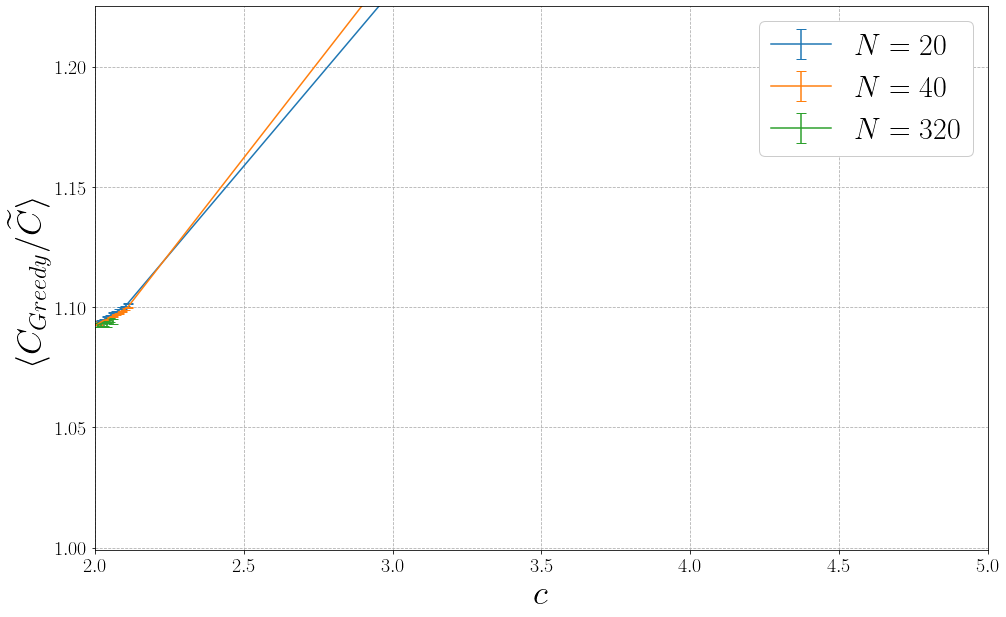

In [177]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'Greedy'

for l in sorted(data_vor5.keys()):
    
    ii = []
    mean_vhs = []
    delta_vhs = []

    for i in data_vor5[l].id_values:
            
        if alg in data_vor5[l].raw_results[i].columns:

            ii.append(i)
            
            subset = data_vor5[l].raw_results[i].dropna(subset=alg)    

            vh = subset[alg] / subset['Schranke4b']

            mean_vhs.append(vh.mean())
            delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

    ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{Greedy} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim((2,5))
ax.set_ylim((0.999, 1.225))

plt.savefig(os.path.join(plot_output_path, 'cgreedy_durch_bound_5a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

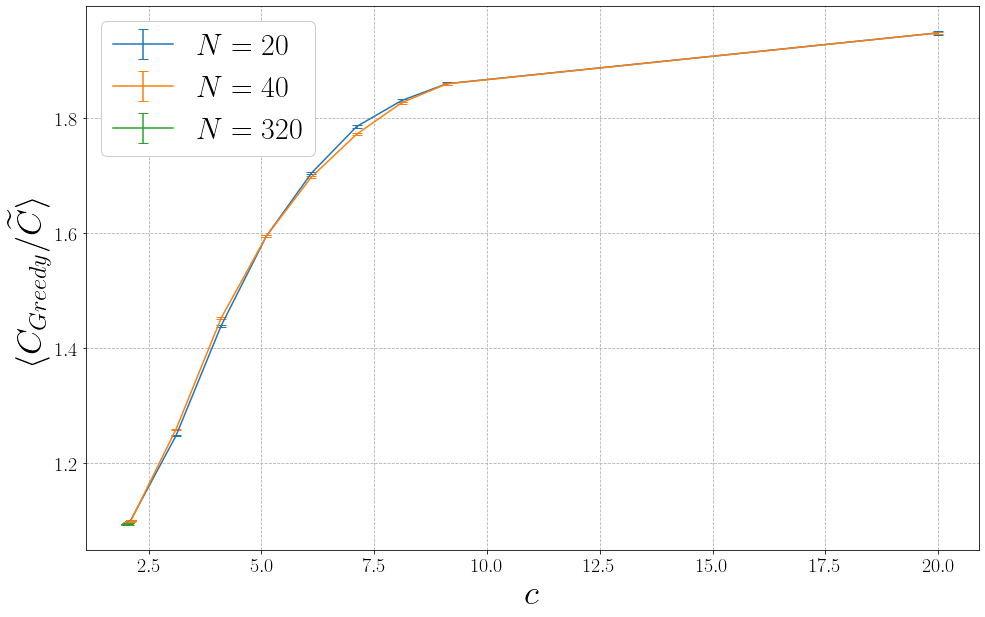

In [178]:
fig, ax = plt.subplots(figsize=(16,10))

alg = 'Greedy'

for l in sorted(data_vor5.keys()):
    
    ii = []
    mean_vhs = []
    delta_vhs = []

    for i in data_vor5[l].id_values:
            
        if alg in data_vor5[l].raw_results[i].columns:

            ii.append(i)
            
            subset = data_vor5[l].raw_results[i].dropna(subset=alg)    

            vh = subset[alg] / subset['Schranke4b']

            mean_vhs.append(vh.mean())
            delta_vhs.append(vh.std() / np.sqrt(vh.shape[0]))

    ax.errorbar(ii, mean_vhs, yerr=delta_vhs, fmt='-', markersize=markersize, markerfacecolor=markerfacecolor, capsize=capsize, label=f'$N={l}$')
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \langle C_{Greedy} / \widetilde{C} \rangle $', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim((2,5))
# ax.set_ylim((0.999, 1.225))

plt.savefig(os.path.join(plot_output_path, 'cgreedy_durch_bound_5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

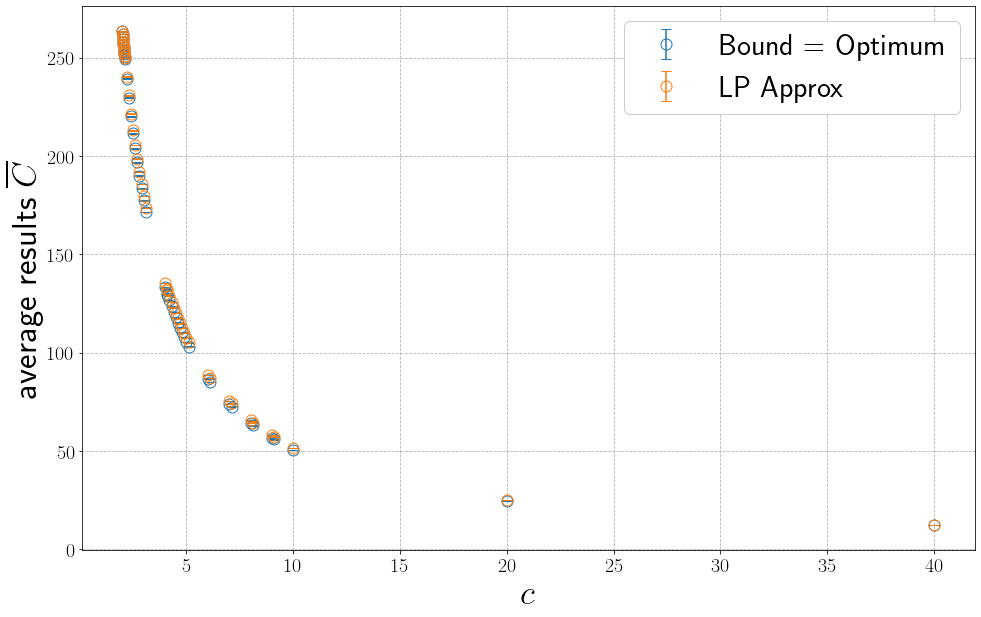

In [179]:
fig, ax = plt.subplots(figsize=(16,10))

# for n in ns:

ax.errorbar(mr.index, mr['Schranke4b'], yerr=sme['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound = Optimum')

ax.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx')
# ax.errorbar(mr.index, mr['Greedy'], yerr=sme['Greedy'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Greedy Approx')


# axins = inset_axes(ax, width='45%', height='45%', loc=1, borderpad=2)
# axins.errorbar(mr.index, mr['Schranke4b'], yerr=sme['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='Bound = Optimum')
# axins.errorbar(mr.index, mr['LP_Approx'], yerr=sme['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='LP-Approx, only cut-constraints')
# axins.errorbar(mr.index, mr['Greedy'], yerr=sme['Greedy'], fmt='o', capsize=capsize, markersize=markersize*1.5, markerfacecolor=markerfacecolor, label='LP-Approx, only cut-constraints')
# axins.set_xlim((1.985, 2.115))
# axins.set_ylim((246, 267))
# axins.grid(ls='--')

# ax.errorbar(mr_ec.index, mr_ec['Schranke4b'], yerr=sme_ec['Schranke4b'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='Bound')
# ax.errorbar(mr_ec.index, mr_ec['LP_Approx'], yerr=sme_ec['LP_Approx'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label='LP Approx, additional constraints')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'average results $\overline{C}$', fontsize=axislabelsize)
# ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
#              r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
ax.legend(fontsize=legendfontsize, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')
plt.savefig(os.path.join(plot_output_path, 'c_mr5.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

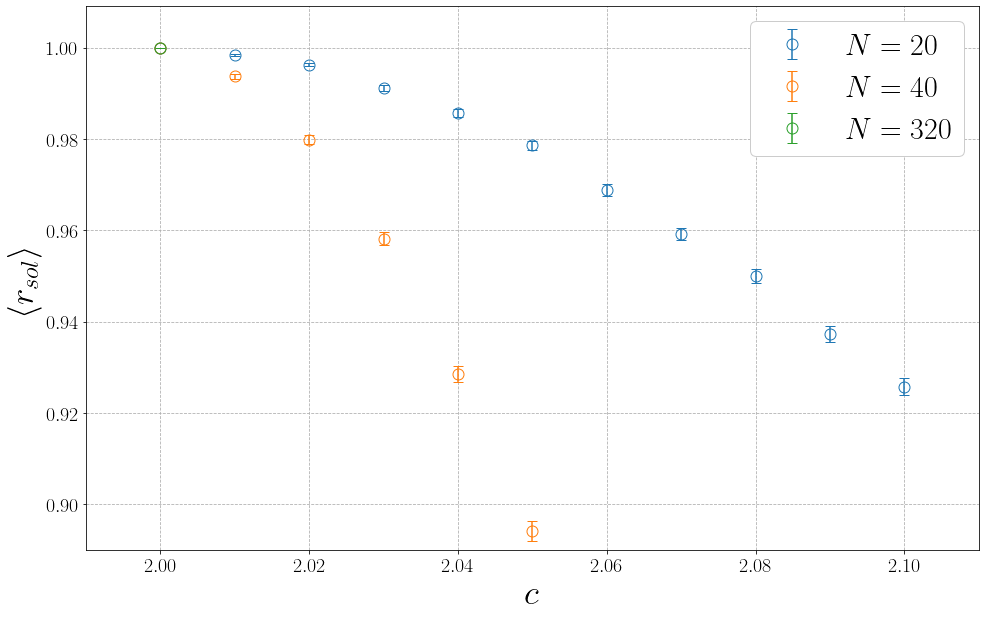

In [78]:
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in ns:
    
#     ax.scatter(lp_vor1[n].index, lp_vor1[n]['Anteil_GGL'], label=f"$N={n}$")
    ax.errorbar(lp_vor5[n].index, lp_vor5[n]['Anteil_GGL'], yerr=lp_vor5[n]['Delta_Anteil_GGL'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f"$N={n}$")
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{sol} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

ax.set_xlim([1.99, 2.11])
ax.set_ylim([0.89, 1.009])

plt.savefig(os.path.join(plot_output_path, 'c_rsol5a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

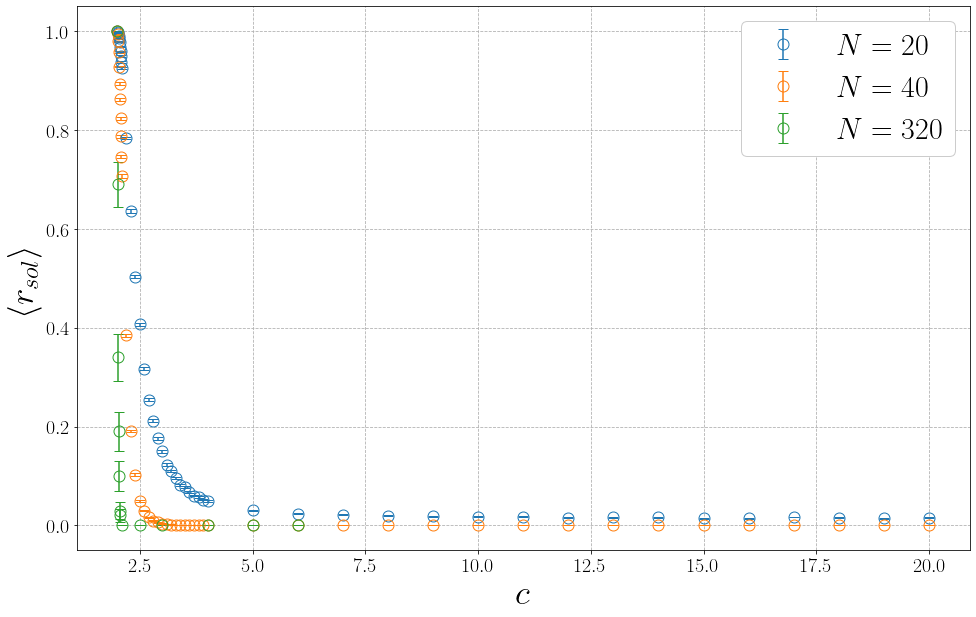

In [79]:
# Anteil vom LP-Approx Algorithmus ganz geloester Problemstellungen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

for n in ns:
    
#     ax.scatter(lp_vor1[n].index, lp_vor1[n]['Anteil_GGL'], label=f"$N={n}$")
    ax.errorbar(lp_vor5[n].index, lp_vor5[n]['Anteil_GGL'], yerr=lp_vor5[n]['Delta_Anteil_GGL'], fmt='o', capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f"$N={n}$")
    
ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{sol} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')

# ax.set_xlim([1.99, 2.11])
# ax.set_ylim([0.89, 1.009])

plt.savefig(os.path.join(plot_output_path, 'c_rsol5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

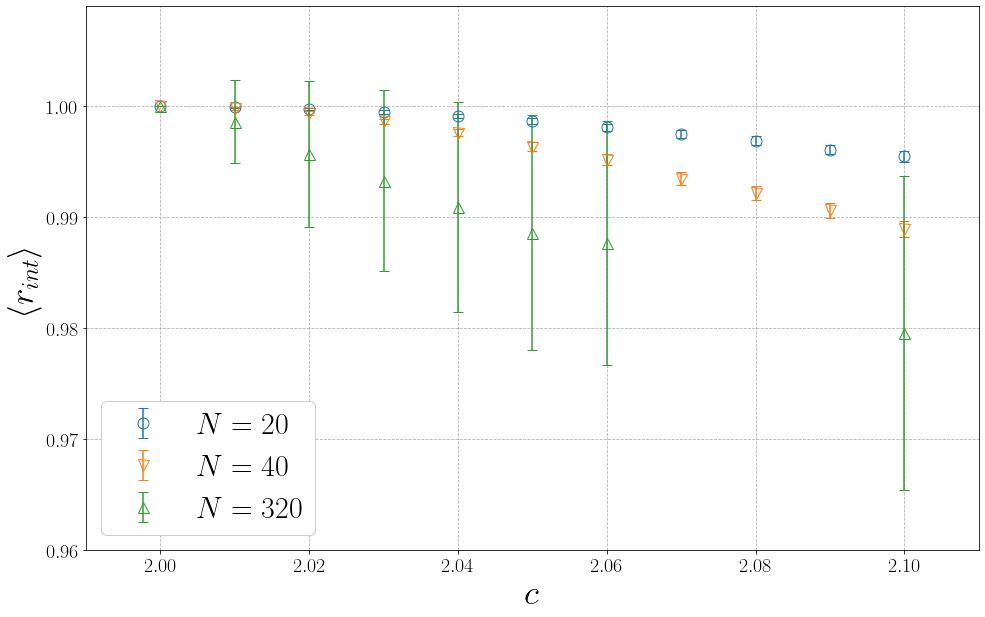

In [80]:
# Anteil ganzzahliger LP Variablen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o', 'o']
fmts = ['o', 'v', '^', 's', 'c']


for i, n in enumerate(ns):

#     ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV'], label=f"$N={n}$")
    ax.errorbar(lp_vor5[n].index, lp_vor5[n]['Anteil_GLPV'], yerr=lp_vor5[n]['Delta_Anteil_GLPV'], fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')


ax.set_xlim([1.99, 2.11])
ax.set_ylim([0.96, 1.009])

# plt.savefig('res_80.png', dpi=300, facecolor=[1,1,1,1])
plt.savefig(os.path.join(plot_output_path, 'c_rint5a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

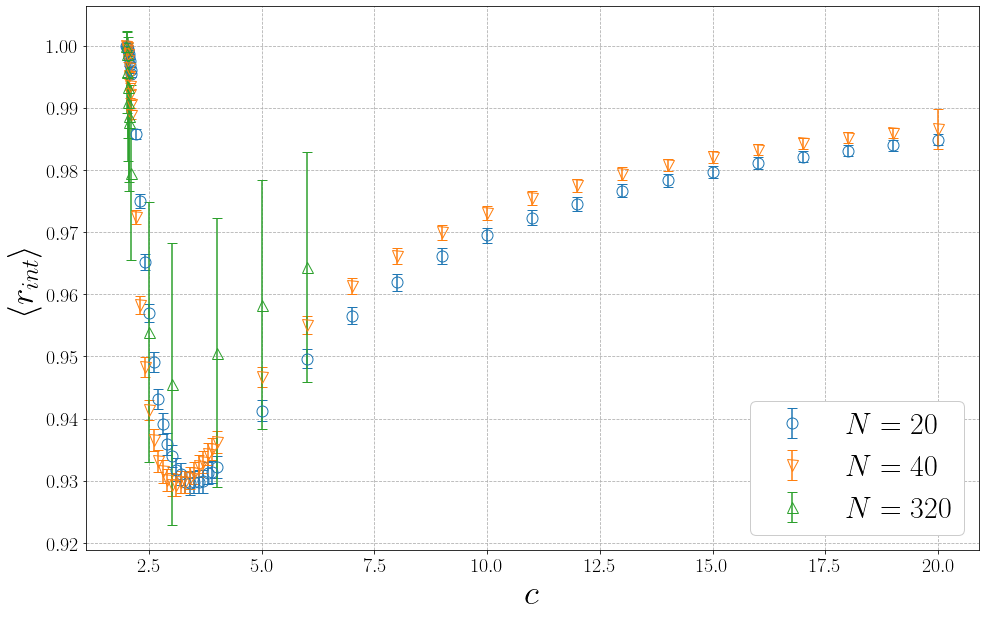

In [81]:
# Anteil ganzzahliger LP Variablen

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o', 'o']
fmts = ['o', 'v', '^', 's', 's']


for i, n in enumerate(ns):

#     ax.scatter(dic_lp[n].index, dic_lp[n]['Anteil_GLPV'], label=f"$N={n}$")
    ax.errorbar(lp_vor5[n].index, lp_vor5[n]['Anteil_GLPV'], yerr=lp_vor5[n]['Delta_Anteil_GLPV'], fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int} \rangle$', fontsize=axislabelsize)

ax.legend(fontsize=30, framealpha=1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.grid(ls='--')


# plt.savefig('res_80.png', dpi=300, facecolor=[1,1,1,1])
plt.savefig(os.path.join(plot_output_path, 'c_rint5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

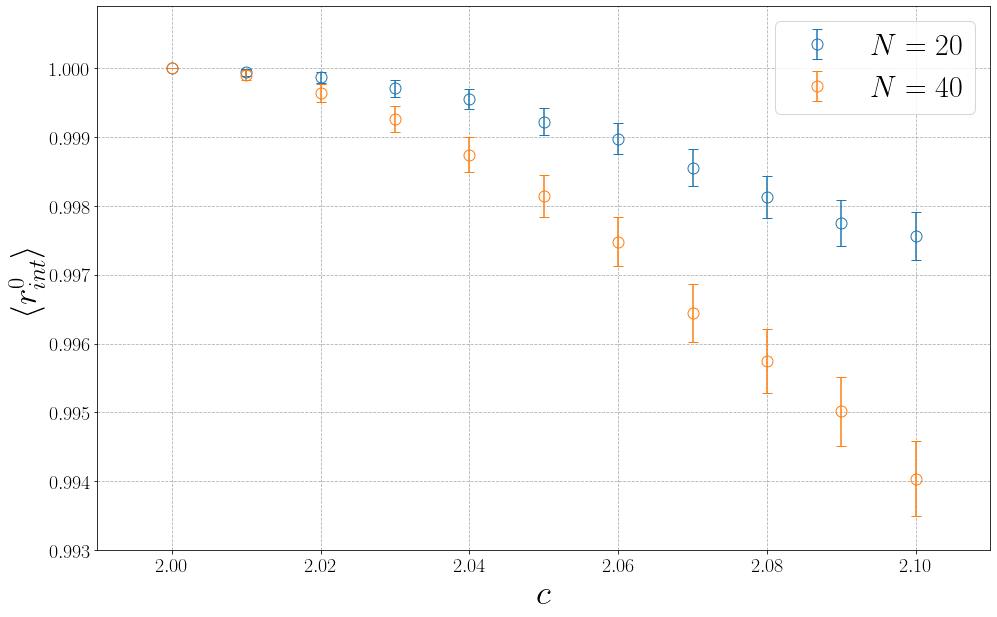

In [82]:
# Anteil ganzzahliger LP Variablen aus der ersten Stage

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o', 'o']

for i, n in enumerate(ns):
    
    if 'Delta_Anteil_GLPV0' in lp_vor5[n].columns:
    
        # subset, wo 'Anteil_GLPV0' auch vorhanden ist
        df_subset = lp_vor5[n].dropna(subset='Anteil_GLPV0')
    
        ax.errorbar(df_subset.index, df_subset['Anteil_GLPV0'], yerr=df_subset['Delta_Anteil_GLPV0'], fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int}^0 \rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30)

ax.set_xlim([1.99, 2.11])
ax.set_ylim([0.993, 1.0009])

plt.savefig(os.path.join(plot_output_path, 'c_rint0_5a.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

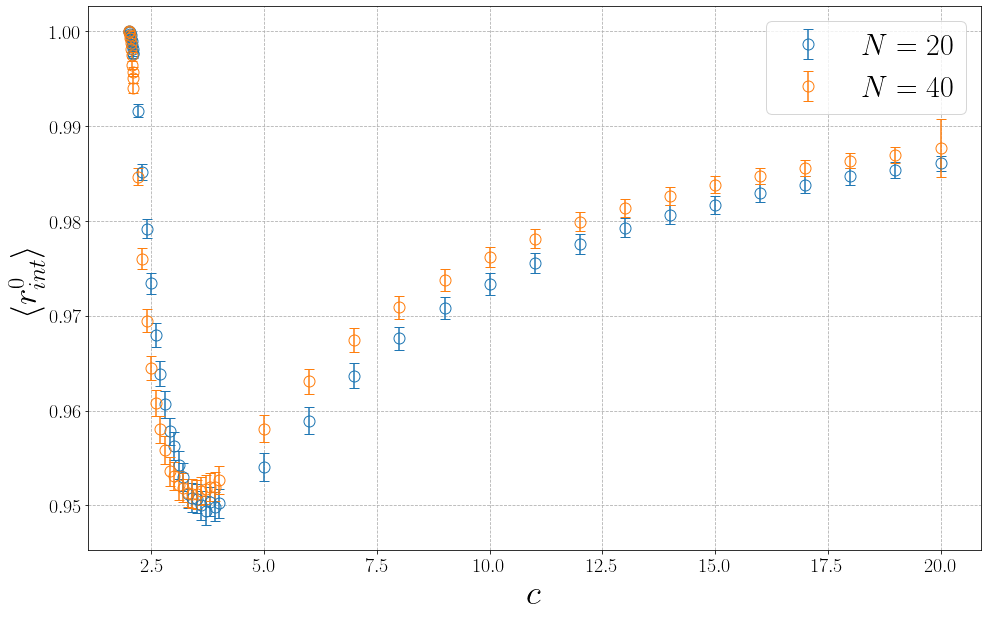

In [83]:
# Anteil ganzzahliger LP Variablen aus der ersten Stage

fig, ax = plt.subplots(figsize=(16, 10))
ax.grid(ls='--')
ax.set_axisbelow(True)

# fmts = ['v', '^', '<']
fmts = ['o', 'o', 'o', 'o']

for i, n in enumerate(ns):
    
    if 'Delta_Anteil_GLPV0' in lp_vor5[n].columns:
    
        # subset, wo 'Anteil_GLPV0' auch vorhanden ist
        df_subset = lp_vor5[n].dropna(subset='Anteil_GLPV0')
    
        ax.errorbar(df_subset.index, df_subset['Anteil_GLPV0'], yerr=df_subset['Delta_Anteil_GLPV0'], fmt=fmts[i], capsize=capsize, markersize=markersize, markerfacecolor=markerfacecolor, label=f'$N={n}$')

ax.set_xlabel('$c$', fontsize=axislabelsize)
ax.set_ylabel(r'$\langle r_{int}^0 \rangle$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(label_fontsize)
ax.legend(fontsize=30)

plt.savefig(os.path.join(plot_output_path, 'c_rint0_5b.png'), dpi=300, facecolor=[1,1,1,1], bbox_inches='tight')

- allgemeine average Ergebnisse
- LP variablen
- relative haeufigkeit fuer verschiedene alphas
- Verhältnisse anschaunen und disskutieren
- finite size scaling und kritische Parameter
- Varianzanalyse?

NameError: name 'rsbs' is not defined

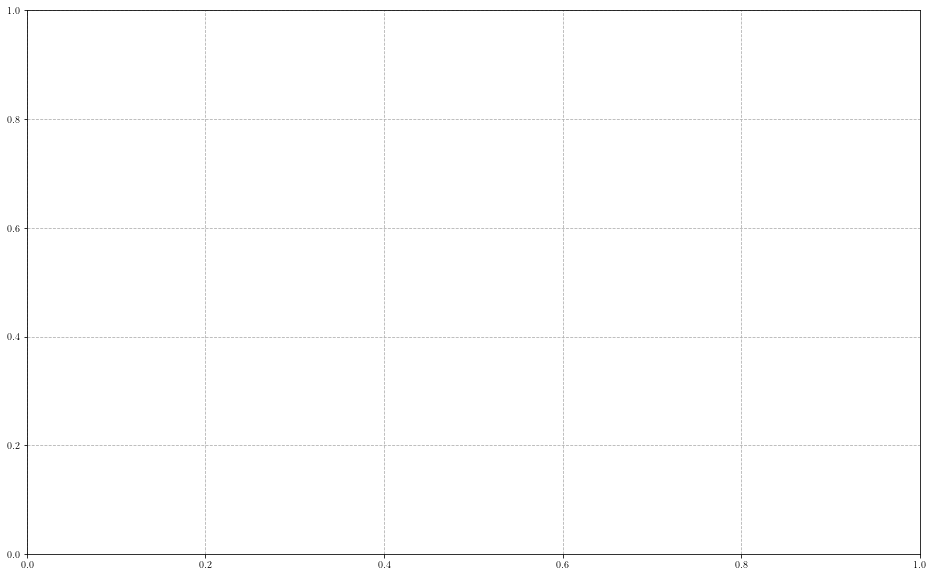

In [3]:
fig, ax = plt.subplots(figsize=(16, 10))

ax.grid(ls='--')
ax.set_axisbelow(True)

fmts = ['o', 'o', 'o']

for i, k in enumerate(rsbs):

    ax.errorbar(rsbs[k].ns, rsbs[k].res_comp, yerr=rsbs[k].delta_res_comp, fmt=fmts[i], markersize=markersize, markerfacecolor=markerfacecolor, capsize=4, label=f'$k = {k}$')

ax.set_xlabel('$N$', fontsize=axislabelsize)
ax.set_ylabel(r'$ \overline{\frac{C_{d} - C_o}{C_o}}$', fontsize=axislabelsize)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.legend(fontsize=30, loc='lower left')    